# Tanzania Tourism Expenditure Prediction - Aviv Shuster

### Introduction

In [ ]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 1.3 MB/s 


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

In [ ]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
corr_matrix_df= df_train.copy()
ID = df_train['ID']
ID_test = df_test['ID']
df_train = df_train.drop("ID",axis=1)
df_test = df_test.drop("ID",axis=1)

In [ ]:
index_train = df_train.shape[0]

In [ ]:
print(index_train)

4809


In [ ]:
df=pd.concat([df_train,df_test],sort=False).reset_index(drop=True)

In [ ]:
df.isnull().sum()

country                     0
age_group                   0
travel_with              1441
total_female                4
total_male                  7
purpose                     0
main_activity               0
info_source                 0
tour_arrangement            0
package_transport_int       0
package_accomodation        0
package_food                0
package_transport_tz        0
package_sightseeing         0
package_guided_tour         0
package_insurance           0
night_mainland              0
night_zanzibar              0
payment_mode                0
first_trip_tz               0
most_impressing           424
total_cost               1601
dtype: int64

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4809 entries, 0 to 4808
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   country                4809 non-null   object 
 1   age_group              4809 non-null   object 
 2   travel_with            3695 non-null   object 
 3   total_female           4806 non-null   float64
 4   total_male             4804 non-null   float64
 5   purpose                4809 non-null   object 
 6   main_activity          4809 non-null   object 
 7   info_source            4809 non-null   object 
 8   tour_arrangement       4809 non-null   object 
 9   package_transport_int  4809 non-null   object 
 10  package_accomodation   4809 non-null   object 
 11  package_food           4809 non-null   object 
 12  package_transport_tz   4809 non-null   object 
 13  package_sightseeing    4809 non-null   object 
 14  package_guided_tour    4809 non-null   object 
 15  pack

In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1601 entries, 0 to 1600
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   country                1601 non-null   object 
 1   age_group              1601 non-null   object 
 2   travel_with            1274 non-null   object 
 3   total_female           1600 non-null   float64
 4   total_male             1599 non-null   float64
 5   purpose                1601 non-null   object 
 6   main_activity          1601 non-null   object 
 7   info_source            1601 non-null   object 
 8   tour_arrangement       1601 non-null   object 
 9   package_transport_int  1601 non-null   object 
 10  package_accomodation   1601 non-null   object 
 11  package_food           1601 non-null   object 
 12  package_transport_tz   1601 non-null   object 
 13  package_sightseeing    1601 non-null   object 
 14  package_guided_tour    1601 non-null   object 
 15  pack

<div dir=rtl>

**בדיקת ערכים חסרים והשלמתן במידת הצורך**<br>
ניכר שיש עמודות עם ערכים חסרים:

In [ ]:
df_train.isna().sum()

country                     0
age_group                   0
travel_with              1114
total_female                3
total_male                  5
purpose                     0
main_activity               0
info_source                 0
tour_arrangement            0
package_transport_int       0
package_accomodation        0
package_food                0
package_transport_tz        0
package_sightseeing         0
package_guided_tour         0
package_insurance           0
night_mainland              0
night_zanzibar              0
payment_mode                0
first_trip_tz               0
most_impressing           313
total_cost                  0
dtype: int64

<div dir=rtl>

ישנן **4809** רשומות בדאטה סט זה.<br>ניכר שישנן מס' עמודות בעלות ערכים חסרים: travel_with, total_female, total_male,  most_impressing

In [ ]:
df_test.isna().sum()

country                    0
age_group                  0
travel_with              327
total_female               1
total_male                 2
purpose                    0
main_activity              0
info_source                0
tour_arrangement           0
package_transport_int      0
package_accomodation       0
package_food               0
package_transport_tz       0
package_sightseeing        0
package_guided_tour        0
package_insurance          0
night_mainland             0
night_zanzibar             0
payment_mode               0
first_trip_tz              0
most_impressing          111
dtype: int64

<div dir=rtl>

ישנן **1601** רשומות בדאטה סט זה.<br>ניכר שישנן מס' עמודות בעלות ערכים חסרים: travel_with, total_female, total_male,  most_impressing

<div dir=rtl>

**סקירת מאפייניו של בסיס הנתונים:**

>1. ID: עמודה אלפא נומרית המציינת את אינדקס הרשומה.
2. country: עמודה טקסטואלית-קטגוריאלית המציינת את מדינת מגוריו של התייר.<br>
3. age_group: עמודה טקסטואלית-קטגוריאלית המציינת את טווח הגילאים של אותו תייר.
4. travel_with: עמודה טקסטואלית-קטגוריאלית המציינת את יחסי הקרבה של התייר ומי שמטייל עימו.
5. total_female: עמודה נומרית המציינת את מס' הנשים המטיילות.
6. total_female: עמודה נומרית המציינת את מס' הגברים המטיילים.
7. purpose: עמודה טקסטואלית-קטגוריאלית המציינת את מטרת הביקור בטנזניה.
8. main_activity: עמודה טקסטואלית-קטגוריאלית המציינת את הפעילות המרכזית בטיול התייר.
9. info_source: עמודה טקסטואלית-קטגוריאלית המציינת את מקור המידע על הביקור בטנזניה.
10. tour_arrangement: עמודה טקסטואלית-קטגוריאלית המציינת את סוג הטיול (מאורגן או עצמאי).
11. package_transport_int: עמודה טקסטואלית-קטגוריאלית המציינת האם (כן או לא) חבילת ההסעות של התייר היא של חברת הסעות לאומית של טנזניה.
12. package_accomodation: עמודה טקסטואלית-קטגוריאלית המציינת האם (כן או לא) חבילת הטיול של התייר כוללת שירותי לינה.
13. package_food: עמודה טקסטואלית-קטגוריאלית המציינת האם (כן או לא) חבילת הטיול של התייר כוללת שירותי הסעדה.
14. package_transport_tz: עמודה טקסטואלית-קטגוריאלית המציינת האם (כן או לא) חבילת הטיול של התייר כוללת שירותי הסעות בתוך טנזניה.
15. package_sightseeing: עמודה טקסטואלית-קטגוריאלית המציינת האם (כן או לא) חבילת הטיול של התייר כוללת טיול באתרי תיירות.
16. package_guided_tour: עמודה טקסטואלית-קטגוריאלית המציינת האם (כן או לא) חבילת הטיול של התייר כוללת שירותי הדרכה בסיורים.
17. package_insurance: עמודה טקסטואלית-קטגוריאלית המציינת האם (כן או לא) חבילת הטיול של התייר כוללת חבילת ביטוחים.
18. night_mainland: עמודה נומרית המציינת את מס' הלילות שהתייר בילה במקום המרכזי של טנזניה.
19. night_zanzibar: עמודה נומרית המציינת את מס' הלילות שהתייר בילה בזנזיבר.
20. payment_mode: עמודה טקסטואלית-קטגוריאלית המציינת את אמצעי התשלום של התייר
21. first_trip_tz: עמודה טקסטואלית-קטגוריאלית המציינת האם (כן או לא) זה הביקור הראשון של התייר בטנזניה.
22. most_impressing: עמודה טקסטואלית-קטגוריאלית המציינת את הדבר שהכי הרשים את התייר בביקורו בטנזניה.
23. total_cost: עמודה נומרית המציינת את סך ההוצאות של התייר בביקורו בטנזניה (ע"פ מטבע מקומי). הנ"ל עמודת ה- **label** אותה יש לחזות בפרויקט זה.

<div dir=rtl>

**סקירת שיטות קידוד (encoding):**

>1. Label encoding: בגישה זו ישנה המרה של כל ערך בעמודה למספר. ישנו החיסרון בשיטה זו, האומר שהערכים הנומריים יכולים להיות מפוענחים בצורה שגויה ע"י אלגוריתמים, ככאלה שיש להם היררכיה או סדר מסוים. לדוגמא, 
במידה ונבחר לקודד למספר רץ (לדוגמא מ-1 עד 6), הנ"ל יכול ליצור בעייה של יחס/השוואה בין הערכים הנומריים שהקצנו לשדות (בטעות נקצה יותר "משקל" לערכים מסויימים על פני האחרים).
גישה זו דורשת שעמודה זו תהייה קטגוריאלית, לפני שמשתמשים בה לקידוד ול-fit_transform על הדאטה.
2. One-Hot Encoding: בגישה זו כל ערך קטגוריאלי מומר לעמודה חדשה עם הערך 1 או 0 (כלומר true/false). כלומר לפיצ'ר אחד יהיה הערך '1' ולשאר יהיה '0'.
על אף שגישה זו מעלימה את בעיית ההיררכיה והסדר, יש לה את החיסרון של הוספת עמודות נוספות לדאטה סט שלנו. הנ"ל יכול לגרום לגדילה משמעותית מאוד בכמות העמודות בדאטה סט, אם ישנם הרבה ערכים ייחודיים בעמודה הקטגוריאלית הזו.

**מתי נשתמש בכל אחת משיטות אלה:**

>1. Label encoding: נשתמש בגישה זו כאשר הפיצ'ר הקטגוריאלי הוא **היררכי** (כמו ארוחות ביום בוקר-צהריים-ערב או בתי ספר יסודי-חטיבה-תיכון וכ'ו). בנוסף, כאשר מספר הקטגוריות בעמודה הינו גדול, כי השיטה One-Hot Encoding תגדיל במקרה זה את הדאטה סט בצורה מאוד משמעותית וזה ישליך על צריכת זיכרון גבוהה.
2. One-Hot Encoding: נשתמש בגישה זו כאשר הפיצ'ר הקטגוריאלי הוא **לא היררכי** (כמו למשל מדינות שונות בעולם או סוגי מכוניות שונים ועוד).
בנוסף, כאשר מספר הקטגוריות בעמודה הינו קטן, כך שגישה זו תמומש ללא פגיעה בצריכת הזיכרון ובגדילה משמעותית של הדאטה סט.

### Data analysis + Feature Engineering

<div dir=rtl>

ראשית, אנתח את ההתפלגות של ה- label של פרויקט זה, **total_cost**.<br>מאפיין זה הינו נומרי ועל כן אין צורך לקודד אותו.**<br>בשלב ה- Preproccessing, אבצע MinMax scaling אשר דואג להקטין את טווח הערכים (המאוד גדול כאן) לטווח בין 0 ל-1. מבלי לפגוע בתהפלגות ה- label!**

<function matplotlib.pyplot.show(*args, **kw)>

<Figure size 1440x2880 with 0 Axes>

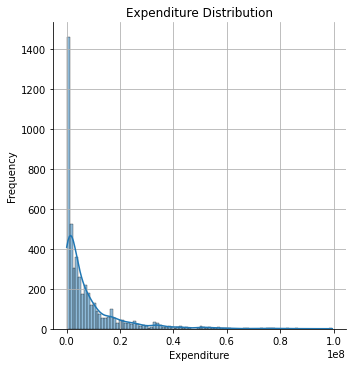

In [ ]:
plt.figure(figsize=(20,40))
fig = sns.displot(x = df_train["total_cost"],data=df_train,kde=True)
fig.set(xlabel='Expenditure',ylabel='Frequency',title='Expenditure Distribution')
plt.grid(True)
plt.show

<div dir=rtl>

המאפיין **ID** הינו שדה אפלא נומרי ממנו ניתן להיפטר, כך שתהייה עמודת אינדקסים דיפולטית לדאטה סט זה.

In [ ]:
df_train.head(5)

,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,package_transport_int,...,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz,most_impressing,total_cost
0,SWIZERLAND,45-64,Friends/Relatives,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Friends, relatives",Independent,No,...,No,No,No,No,13.0,0.0,Cash,No,Friendly People,674602.5
1,UNITED KINGDOM,25-44,NaN,1.0,0.0,Leisure and Holidays,Cultural tourism,others,Independent,No,...,No,No,No,No,14.0,7.0,Cash,Yes,"Wonderful Country, Landscape, Nature",3214906.5
2,UNITED KINGDOM,25-44,Alone,0.0,1.0,Visiting Friends and Relatives,Cultural tourism,"Friends, relatives",Independent,No,...,No,No,No,No,1.0,31.0,Cash,No,Excellent Experience,3315000.0
3,UNITED KINGDOM,25-44,Spouse,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Package Tour,No,...,Yes,Yes,Yes,No,11.0,0.0,Cash,Yes,Friendly People,7790250.0
4,CHINA,1-24,NaN,1.0,0.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Independent,No,...,No,No,No,No,7.0,4.0,Cash,Yes,No comments,1657500.0


In [ ]:
df_test.head(5)

,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,package_transport_int,...,package_food,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz,most_impressing
0,AUSTRALIA,45-64,Spouse,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Package Tour,Yes,...,Yes,Yes,Yes,Yes,Yes,10,3,Cash,Yes,Wildlife
1,SOUTH AFRICA,25-44,Friends/Relatives,0.0,4.0,Business,Wildlife tourism,Tanzania Mission Abroad,Package Tour,Yes,...,No,No,No,No,No,13,0,Cash,No,"Wonderful Country, Landscape, Nature"
2,GERMANY,25-44,Friends/Relatives,3.0,0.0,Leisure and Holidays,Beach tourism,"Friends, relatives",Independent,No,...,No,No,No,No,No,7,14,Cash,No,No comments
3,CANADA,24-Jan,Friends/Relatives,2.0,0.0,Leisure and Holidays,Cultural tourism,others,Independent,No,...,No,No,No,No,No,0,4,Cash,Yes,Friendly People
4,UNITED KINGDOM,45-64,Friends/Relatives,2.0,2.0,Leisure and Holidays,Wildlife tourism,"Friends, relatives",Package Tour,Yes,...,Yes,Yes,No,No,No,10,0,Cash,Yes,Friendly People


<div dir=rtl>

המאפיין **country** הינו שדה טקסטואלי-קטגוריאלי לא היררכי אותו יש לקודד ע"פ שיטת **One-Hot encoding**. 

In [ ]:
df_train['country'].unique()

array(['SWIZERLAND', 'UNITED KINGDOM', 'CHINA', 'SOUTH AFRICA',
       'UNITED STATES OF AMERICA', 'NIGERIA', 'INDIA', 'BRAZIL', 'CANADA',
       'MALT', 'MOZAMBIQUE', 'RWANDA', 'AUSTRIA', 'MYANMAR', 'GERMANY',
       'KENYA', 'ALGERIA', 'IRELAND', 'DENMARK', 'SPAIN', 'FRANCE',
       'ITALY', 'EGYPT', 'QATAR', 'MALAWI', 'JAPAN', 'SWEDEN',
       'NETHERLANDS', 'UAE', 'UGANDA', 'AUSTRALIA', 'YEMEN',
       'NEW ZEALAND', 'BELGIUM', 'NORWAY', 'ZIMBABWE', 'ZAMBIA', 'CONGO',
       'BURGARIA', 'PAKISTAN', 'GREECE', 'MAURITIUS', 'DRC', 'OMAN',
       'PORTUGAL', 'KOREA', 'SWAZILAND', 'TUNISIA', 'KUWAIT', 'DOMINICA',
       'ISRAEL', 'FINLAND', 'CZECH REPUBLIC', 'UKRAIN', 'ETHIOPIA',
       'BURUNDI', 'SCOTLAND', 'RUSSIA', 'GHANA', 'NIGER', 'MALAYSIA',
       'COLOMBIA', 'LUXEMBOURG', 'NEPAL', 'POLAND', 'SINGAPORE',
       'LITHUANIA', 'HUNGARY', 'INDONESIA', 'TURKEY', 'TRINIDAD TOBACCO',
       'IRAQ', 'SLOVENIA', 'UNITED ARAB EMIRATES', 'COMORO', 'SRI LANKA',
       'IRAN', 'MONTENEGRO', 

<div dir=rtl>

כעת אציג את ההתפלגות של המאפיין country :

<function matplotlib.pyplot.show(*args, **kw)>

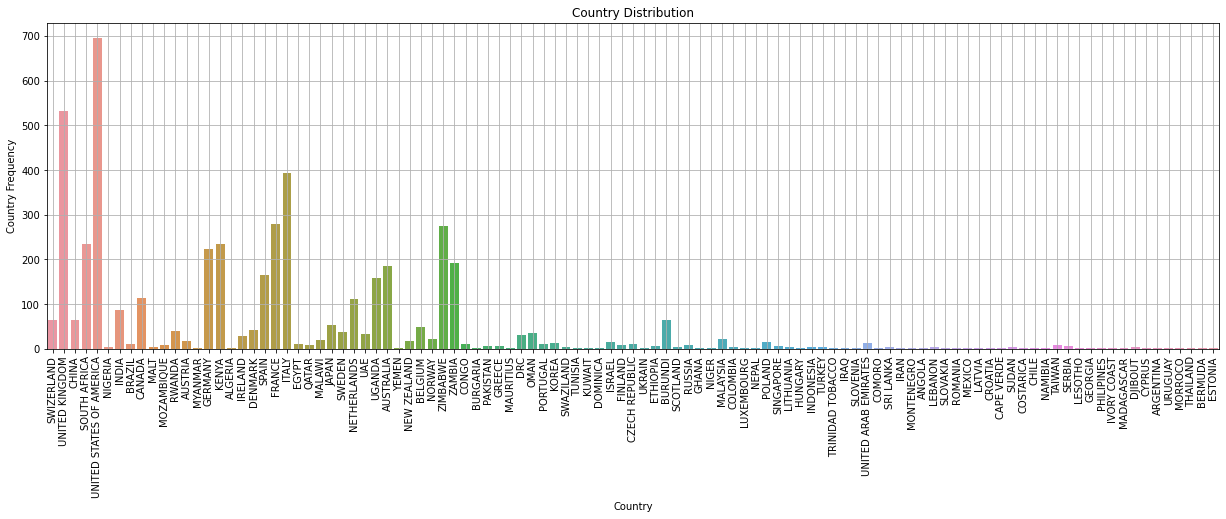

In [ ]:
plt.figure(figsize=(21,6))
ax=sns.countplot(x="country",data=df_train)
ax.set(xlabel='Country', ylabel='Country Frequency', title ='Country Distribution')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.grid(True)
plt.show


<div dir=rtl>

ניכר כי רוב התיירים בטנזניה, מגיעים מארה"ב אנגליה ואיטליה. מצד שני, ישנן לא מעט מדינות אליהן כמעט ולא מגיעים תיירים אל טנזניה (כדוגמת אסטוניה,ברמודה, אורוגוואי ועוד).

[Text(0, 0.5, 'Country'),
 Text(0.5, 0, 'Frequency'),
 Text(0.5, 1.0, 'Top 10 visitors in Tanzania')]

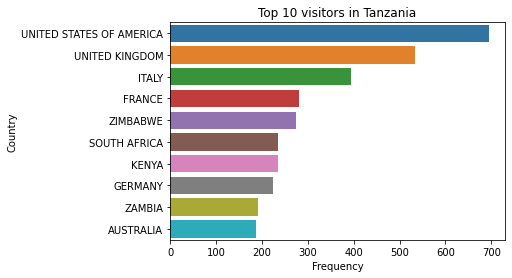

In [ ]:
ax = sns.barplot(x = df_train["country"].value_counts().sort_values(ascending = False).head(10), y = df_train["country"].value_counts().sort_values(ascending = False).head(10).index)
ax.set(xlabel='Frequency', ylabel='Country', title ='Top 10 visitors in Tanzania')

<div dir=rtl>

ניכר כי המדינות מהן מגיעים הכי הרבה תיירים לטנזניה הן ארה"ב, איטליה וצרפת.

<div dir=rtl>

ניתן גם לקבל תמונה על **המדינות מהן מגיעים התיירים שמבזבזים הכי הרבה**, בממוצע, על תיירות בטנזניה:

Text(0.5, 1.0, "Top 5 most paying countries's citizens in Tanzania")

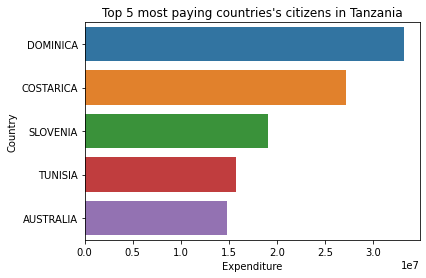

In [ ]:
fig = sns.barplot(x = df_train.groupby("country")["total_cost"].mean().sort_values(ascending = False).head(5),y = df_train.groupby("country")["total_cost"].mean().sort_values(ascending = False).head(5).index)
fig.set_xlabel("Expenditure")
fig.set_ylabel("Country")
fig.set_title("Top 5 most paying countries's citizens in Tanzania")

In [ ]:
ohe = OneHotEncoder(handle_unknown='ignore')  #One-Hot encoding
country_list = df['country'].unique().tolist()
country_list = [word for word in country_list]
df_temp = pd.DataFrame(ohe.fit_transform(df[['country']]).toarray())
df_temp.rename(columns=lambda i: country_list[i], inplace = True)
df = df.join(df_temp)

In [ ]:
df.head()

,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,package_transport_int,...,HAITI,VIETNAM,BOSNIA,LIBERIA,PERU,JAMAICA,MACEDONIA,GUINEA,SOMALI,SAUD ARABIA
0,SWIZERLAND,45-64,Friends/Relatives,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Friends, relatives",Independent,No,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,UNITED KINGDOM,25-44,NaN,1.0,0.0,Leisure and Holidays,Cultural tourism,others,Independent,No,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,UNITED KINGDOM,25-44,Alone,0.0,1.0,Visiting Friends and Relatives,Cultural tourism,"Friends, relatives",Independent,No,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,UNITED KINGDOM,25-44,Spouse,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Package Tour,No,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,CHINA,1-24,NaN,1.0,0.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Independent,No,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<div dir=rtl>

המאפיין **age_group** הינו שדה אלפא נומרי-קטגוריאלי היררכי אותו יש לקודד ע"פ שיטת **Label encoding**.

In [ ]:
df['age_group'].unique()

array(['45-64', '25-44', '1-24', '65+', '24-Jan'], dtype=object)

In [ ]:
df['age_group'] = df['age_group'].apply(lambda val: str(val).replace("24-Jan", "1-24"))

In [ ]:
df['age_group'].unique()

array(['45-64', '25-44', '1-24', '65+'], dtype=object)

[Text(0, 0.5, 'Frequency'),
 Text(0.5, 0, 'Age Group'),
 Text(0.5, 1.0, 'Age Group Distribution')]

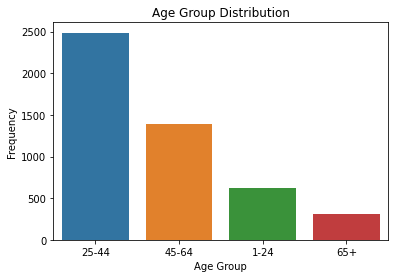

In [ ]:
ax = sns.barplot(x = df_train["age_group"].value_counts().sort_values(ascending = False).index, y = df_train["age_group"].value_counts().sort_values(ascending = False))
ax.set(xlabel='Age Group', ylabel='Frequency', title ='Age Group Distribution')

<div dir=rtl>

ניתן גם לקבל תמונה על **קבוצות גיל בהן מגיעים התיירים שמבזבזים הכי הרבה**, בממוצע, על תיירות בטנזניה:

Text(0.5, 1.0, 'Age group per Expenditure')

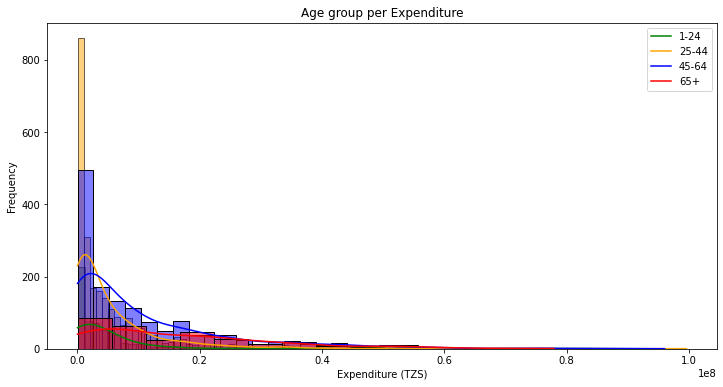

In [ ]:
plt.figure(figsize=(12,6))
fig = sns.histplot(df_train.query("age_group == '1-24'")["total_cost"], color = "green",kde=True)
fig = sns.histplot(df_train.query("age_group == '25-44'")["total_cost"], color = "orange",kde=True)
fig = sns.histplot(df_train.query("age_group == '45-64'")["total_cost"], color = "blue",kde=True)
fig = sns.histplot(df_train.query("age_group == '65+'")["total_cost"], color = "red",kde=True)
fig.legend(labels = ["1-24", "25-44", "45-64", "65+"])
fig.set_xlabel("Expenditure (TZS)")
fig.set_ylabel("Frequency")
fig.set_title("Age group per Expenditure")

<div dir=rtl>

ניכר שתיירים מבוגרים (65 פלוס) ותיירם קצת פחות מבוגרים (45-64) מוציאים יותר מהגילאים הצעירים. 

In [ ]:
# age_group mapping (label encoding by hand)
df['age_group'] = df['age_group'].map({"1-24":1, "25-44":2, "45-64":3, "65+":4})

<div dir=rtl>

המאפיין **travel_with** הינו שדה טקסטואלי-קטגוריאלי לא היררכי אותו יש לקודד ע"פ שיטת **One-Hot encoding**.

In [ ]:
df['travel_with'].isna().sum() # missing values

1441

In [ ]:
df['travel_with'].fillna('None',inplace=True)

In [ ]:
df['travel_with'].isna().sum()

0

In [ ]:
df.head(5)

,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,package_transport_int,...,HAITI,VIETNAM,BOSNIA,LIBERIA,PERU,JAMAICA,MACEDONIA,GUINEA,SOMALI,SAUD ARABIA
0,SWIZERLAND,3,Friends/Relatives,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Friends, relatives",Independent,No,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,UNITED KINGDOM,2,None,1.0,0.0,Leisure and Holidays,Cultural tourism,others,Independent,No,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,UNITED KINGDOM,2,Alone,0.0,1.0,Visiting Friends and Relatives,Cultural tourism,"Friends, relatives",Independent,No,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,UNITED KINGDOM,2,Spouse,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Package Tour,No,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,CHINA,1,None,1.0,0.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Independent,No,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df['travel_with'].unique()

array(['Friends/Relatives', 'None', 'Alone', 'Spouse', 'Children',
       'Spouse and Children'], dtype=object)

<div dir=rtl>

כעת אציג את התפלגות המאפיין travel_with:


[Text(0, 0.5, 'Frequency'),
 Text(0.5, 0, 'Travel With'),
 Text(0.5, 1.0, 'Travel With Distribution')]

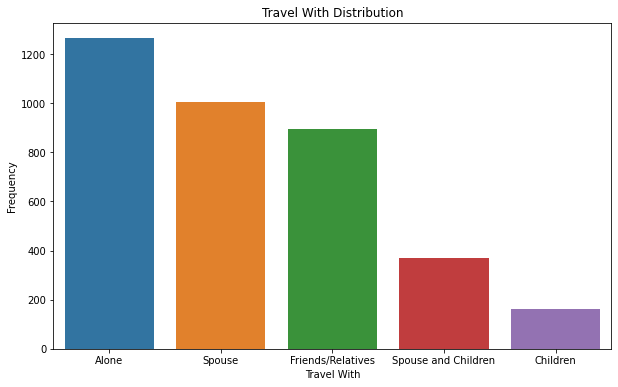

In [ ]:
plt.figure(figsize=(10,6))
ax = sns.barplot(x = df_train["travel_with"].value_counts().sort_values(ascending = False).index, y = df_train["travel_with"].value_counts().sort_values(ascending = False))
ax.set(xlabel='Travel With', ylabel='Frequency', title ='Travel With Distribution')

<div dir=rtl>

ניכר כי רוב התיירים בדאטה סט זה מטיילים לטנזניה לבדם. יש לא מעט רשומות בהן אין אינדיקציה למס' המטיילים כך שקשה לקבל תמונה מספיק מדויקת.<br> חלקם מטיילים עם בן/בת הזוג שלהם והמיעוט מטיילים עם כל המשפחה או רק עם הילדים.

Text(0.5, 1.0, 'most paying tourists when traveling with other')

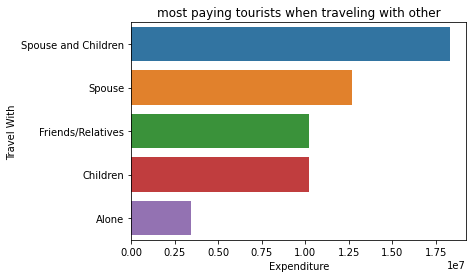

In [ ]:
fig = sns.barplot(x = df_train.groupby("travel_with")["total_cost"].mean().sort_values(ascending = False).head(6),y = df_train.groupby("travel_with")["total_cost"].mean().sort_values(ascending = False).head(6).index)
fig.set_xlabel("Expenditure")
fig.set_ylabel("Travel With")
fig.set_title("most paying tourists when traveling with other")

<div dir=rtl>

**ניכר כי ישנה מגמה האומרת שככל שמטיילים עם יותר אנשים, כך בהתאמה מבזבזים יותר**.<br>תיירים שמטיילים לטנזניה לבד מוציאים הכי פחות כסף בטיולם. לעומת זאת, תיירים שמטיילים לטנזניה עם בן/בת הזוג והילדים, מוציאים הכי הרבה.

In [ ]:
ohe = OneHotEncoder(handle_unknown='ignore')
travel_with_list = df['travel_with'].unique().tolist()
travel_with_list = ['travel_with_' + word for word in travel_with_list]
df_temp = pd.DataFrame(ohe.fit_transform(df[['travel_with']]).toarray())
df_temp.rename(columns=lambda i: travel_with_list[i], inplace = True)
df = df.join(df_temp)

In [ ]:
df.head(5)

,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,package_transport_int,...,MACEDONIA,GUINEA,SOMALI,SAUD ARABIA,travel_with_Friends/Relatives,travel_with_None,travel_with_Alone,travel_with_Spouse,travel_with_Children,travel_with_Spouse and Children
0,SWIZERLAND,3,Friends/Relatives,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Friends, relatives",Independent,No,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,UNITED KINGDOM,2,None,1.0,0.0,Leisure and Holidays,Cultural tourism,others,Independent,No,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,UNITED KINGDOM,2,Alone,0.0,1.0,Visiting Friends and Relatives,Cultural tourism,"Friends, relatives",Independent,No,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,UNITED KINGDOM,2,Spouse,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Package Tour,No,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,CHINA,1,None,1.0,0.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Independent,No,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


<div dir=rtl>

המאפיין **total_female** הינו שדה נומרי

In [ ]:
df['total_female'].unique()

array([ 1.,  0.,  2.,  4.,  3.,  5., 12., 10.,  6., nan, 11.,  7., 15.,
        9., 49., 20.])

In [ ]:
df['total_female'].isna().sum()

4

In [ ]:
df['total_female'].fillna(df['total_female'].median(),inplace = True) # fill the missing values with the median value of the column

In [ ]:
df['total_female'].unique()

array([ 1.,  0.,  2.,  4.,  3.,  5., 12., 10.,  6., 11.,  7., 15.,  9.,
       49., 20.])

[Text(0, 0.5, 'Frequency'),
 Text(0.5, 0, 'Total Female'),
 Text(0.5, 1.0, 'Total Female Distribution')]

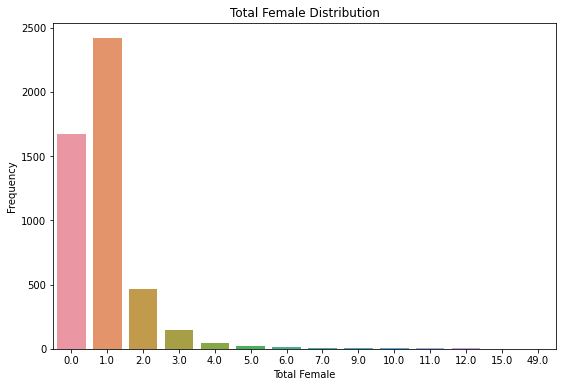

In [ ]:
plt.figure(figsize=(9,6))
ax = sns.barplot(x = df_train["total_female"].value_counts().sort_values(ascending = False).index, y = df_train["total_female"].value_counts().sort_values(ascending = False))
ax.set(xlabel='Total Female', ylabel='Frequency', title ='Total Female Distribution')

<div dir=rtl>

ניכר כי מס' הנשים השכיח בטיול לטנזניה הינו בין 0 ל- 2 כאשר לרוב מדובר על אישה אחת בקבוצה המטיילת.<br> ניכר שיש outlayer בדמות קבוצה המכילה 15 נשים וקבוצה מכילה 49 נשים (**אשקול בהמשך אם להוריד רשומה זו כדי שחוסר האיזון לא יהיה משמעותי**)

In [ ]:
df['total_female'] = df['total_female'].astype('int') # casting to int (from float)

In [ ]:
df.head(5)

,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,package_transport_int,...,MACEDONIA,GUINEA,SOMALI,SAUD ARABIA,travel_with_Friends/Relatives,travel_with_None,travel_with_Alone,travel_with_Spouse,travel_with_Children,travel_with_Spouse and Children
0,SWIZERLAND,3,Friends/Relatives,1,1.0,Leisure and Holidays,Wildlife tourism,"Friends, relatives",Independent,No,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,UNITED KINGDOM,2,None,1,0.0,Leisure and Holidays,Cultural tourism,others,Independent,No,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,UNITED KINGDOM,2,Alone,0,1.0,Visiting Friends and Relatives,Cultural tourism,"Friends, relatives",Independent,No,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,UNITED KINGDOM,2,Spouse,1,1.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Package Tour,No,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,CHINA,1,None,1,0.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Independent,No,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


<div dir=rtl>

המאפיין **total_male** הינו שדה נומרי

In [ ]:
df['total_male'].unique()

array([ 1.,  0.,  2.,  3.,  4.,  5.,  6., nan, 15., 17.,  7., 10., 12.,
       44.,  9., 40.])

In [ ]:
df['total_male'].isna().sum()

7

In [ ]:
df['total_male'].fillna(df['total_male'].median(),inplace = True) # fill the missing values with the median value of the column

In [ ]:
df['total_male'].unique()

array([ 1.,  0.,  2.,  3.,  4.,  5.,  6., 15., 17.,  7., 10., 12., 44.,
        9., 40.])

[Text(0, 0.5, 'Frequency'),
 Text(0.5, 0, 'Total Male'),
 Text(0.5, 1.0, 'Total Male Distribution')]

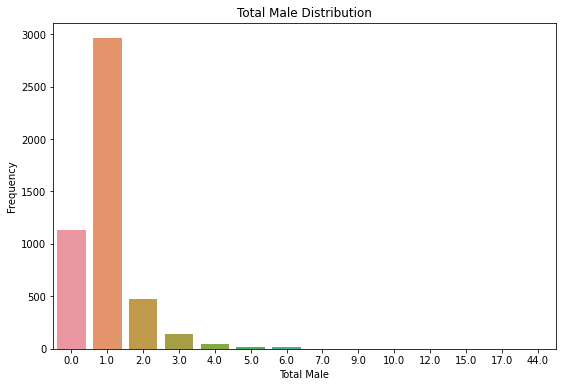

In [ ]:
plt.figure(figsize=(9,6))
ax = sns.barplot(x = df_train["total_male"].value_counts().sort_values(ascending = False).index, y = df_train["total_male"].value_counts().sort_values(ascending = False))
ax.set(xlabel='Total Male', ylabel='Frequency', title ='Total Male Distribution')

<div dir=rtl>

ניכר כי מס' הגברים השכיח בטיול לטנזניה הינו בין 0 ל- 2 כאשר לרוב מדובר על גבר אחד בקבוצה המטיילת.<br> ניכר שיש outlayer בדמות קבוצה המכילה 17 גברים וקבוצה המכילה 47 גברים (**אשקול בהמשך אם להוריד רשומה זו כדי שחוסר האיזון לא יהיה משמעותי**)

In [ ]:
df['total_male'] = df['total_male'].astype('int') # casting to int (from float)

In [ ]:
df.head(5)

,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,package_transport_int,...,MACEDONIA,GUINEA,SOMALI,SAUD ARABIA,travel_with_Friends/Relatives,travel_with_None,travel_with_Alone,travel_with_Spouse,travel_with_Children,travel_with_Spouse and Children
0,SWIZERLAND,3,Friends/Relatives,1,1,Leisure and Holidays,Wildlife tourism,"Friends, relatives",Independent,No,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,UNITED KINGDOM,2,None,1,0,Leisure and Holidays,Cultural tourism,others,Independent,No,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,UNITED KINGDOM,2,Alone,0,1,Visiting Friends and Relatives,Cultural tourism,"Friends, relatives",Independent,No,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,UNITED KINGDOM,2,Spouse,1,1,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Package Tour,No,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,CHINA,1,None,1,0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Independent,No,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


<div dir=rtl>

את שני המאפיינים, **total_male** ו- **total_female**, ניתן לחבר לכדי משתנה חדש בשם **total_persons** שאולי יעניק מידע חדש שיעזור למודל:

In [ ]:
df["total_persons"] = df["total_female"] + df["total_male"]
df['total_persons'] = df['total_persons'].astype('int')

In [ ]:
df.head(5)

,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,package_transport_int,...,GUINEA,SOMALI,SAUD ARABIA,travel_with_Friends/Relatives,travel_with_None,travel_with_Alone,travel_with_Spouse,travel_with_Children,travel_with_Spouse and Children,total_persons
0,SWIZERLAND,3,Friends/Relatives,1,1,Leisure and Holidays,Wildlife tourism,"Friends, relatives",Independent,No,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2
1,UNITED KINGDOM,2,None,1,0,Leisure and Holidays,Cultural tourism,others,Independent,No,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
2,UNITED KINGDOM,2,Alone,0,1,Visiting Friends and Relatives,Cultural tourism,"Friends, relatives",Independent,No,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1
3,UNITED KINGDOM,2,Spouse,1,1,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Package Tour,No,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2
4,CHINA,1,None,1,0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Independent,No,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1


<div dir=rtl>

המאפיין **purpose** הינו שדה טקסטואלי-קטגוריאלי לא היררכי אותו יש לקודד ע"פ שיטת **One-Hot encoding**.

In [ ]:
df['purpose'].unique()

array(['Leisure and Holidays', 'Visiting Friends and Relatives',
       'Business', 'Meetings and Conference', 'Volunteering',
       'Scientific and Academic', 'Other'], dtype=object)

<div dir=rtl>

כעת אציג את התפלגות המאפיין purpose:


[Text(0, 0.5, 'Frequency'),
 Text(0.5, 0, 'Purpose Of Trip'),
 Text(0.5, 1.0, 'Purpose Of Trip Distribution')]

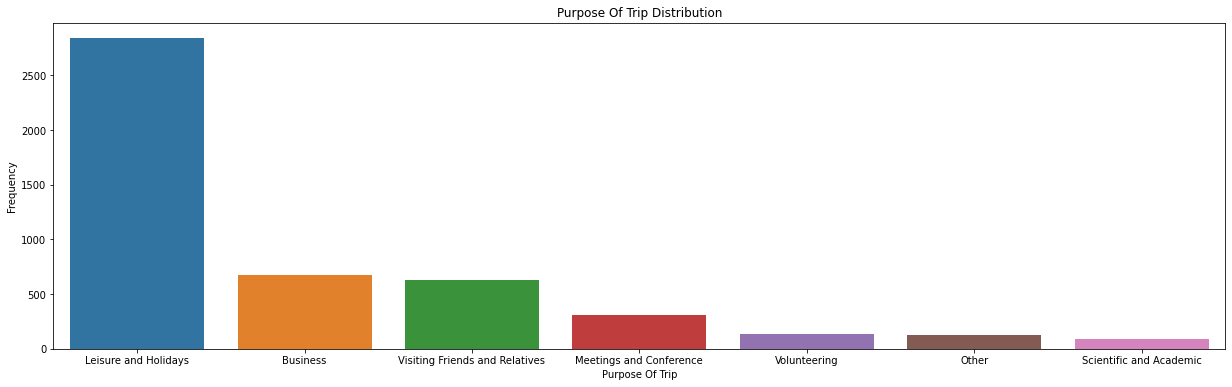

In [ ]:
plt.figure(figsize=(21,6))
ax = sns.barplot(x = df_train["purpose"].value_counts().sort_values(ascending = False).index, y = df_train["purpose"].value_counts().sort_values(ascending = False))
ax.set(xlabel='Purpose Of Trip', ylabel='Frequency', title ='Purpose Of Trip Distribution')

<div dir=rtl>

ניכר כי רוב התיירים, בדאטה סט זה, מגיעים לטנזניה על מנת לחפוש. לאחר מכן, נפוצים התיירים הבאים לצורכי עסקים או למטרת פגישה עם חברים או קרובים.

Text(0.5, 1.0, 'most paying tourists depend on the traveling purpose')

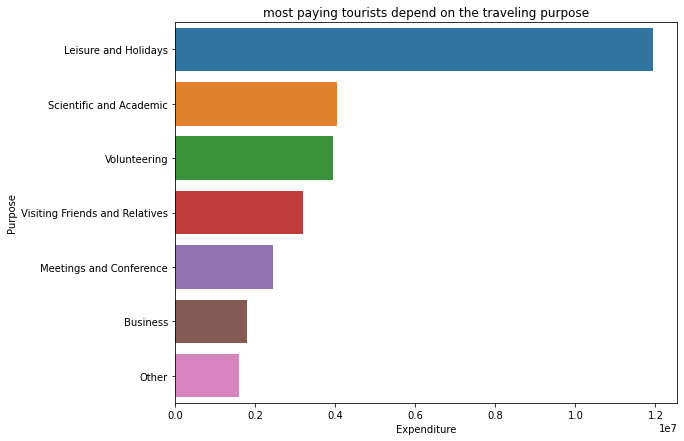

In [ ]:
plt.figure(figsize=(9,7))
fig = sns.barplot(x = df_train.groupby("purpose")["total_cost"].mean().sort_values(ascending = False).head(7),y = df_train.groupby("purpose")["total_cost"].mean().sort_values(ascending = False).head(7).index)
fig.set_xlabel("Expenditure")
fig.set_ylabel("Purpose")
fig.set_title("most paying tourists depend on the traveling purpose")

<div dir=rtl>

ניכר כי **תיירים המגיעים לטנזניה לטובת חופשה ופנאי, מוציאים את סכום הכסף בממוצע הגבוה ביותר (בפער)**. במקום השני נמצאים התיירים שבאים לטנזניה לצורכי מחקר ומדע. גם תיירים המגיעים לטנזניה לצורכי התנדבות, נמצאים בראש הרשימה.

In [ ]:
ohe = OneHotEncoder(handle_unknown='ignore')  #One-Hot encoding
purpose_list = df['purpose'].unique().tolist()
purpose_list = [word for word in purpose_list]
df_temp = pd.DataFrame(ohe.fit_transform(df[['purpose']]).toarray())
df_temp.rename(columns=lambda i: purpose_list[i], inplace = True)
df = df.join(df_temp)

In [ ]:
df.head(5)

,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,package_transport_int,...,travel_with_Children,travel_with_Spouse and Children,total_persons,Leisure and Holidays,Visiting Friends and Relatives,Business,Meetings and Conference,Volunteering,Scientific and Academic,Other
0,SWIZERLAND,3,Friends/Relatives,1,1,Leisure and Holidays,Wildlife tourism,"Friends, relatives",Independent,No,...,0.0,0.0,2,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,UNITED KINGDOM,2,None,1,0,Leisure and Holidays,Cultural tourism,others,Independent,No,...,0.0,0.0,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,UNITED KINGDOM,2,Alone,0,1,Visiting Friends and Relatives,Cultural tourism,"Friends, relatives",Independent,No,...,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,UNITED KINGDOM,2,Spouse,1,1,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Package Tour,No,...,1.0,0.0,2,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,CHINA,1,None,1,0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Independent,No,...,0.0,0.0,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0


<div dir=rtl>

המאפיין **main_activity** הינו שדה טקסטואלי-קטגוריאלי לא היררכי אותו יש לקודד ע"פ שיטת **One-Hot encoding**.

In [ ]:
df['main_activity'].unique()

array(['Wildlife tourism', 'Cultural tourism', 'Mountain climbing',
       'Beach tourism', 'Conference tourism', 'Hunting tourism',
       'Bird watching', 'business', 'Diving and Sport Fishing'],
      dtype=object)

<div dir=rtl>

כעת אציג את התפלגות המאפיין main_activity:


[Text(0, 0.5, 'Frequency'),
 Text(0.5, 0, 'Main Activity'),
 Text(0.5, 1.0, 'Main Activity Distribution')]

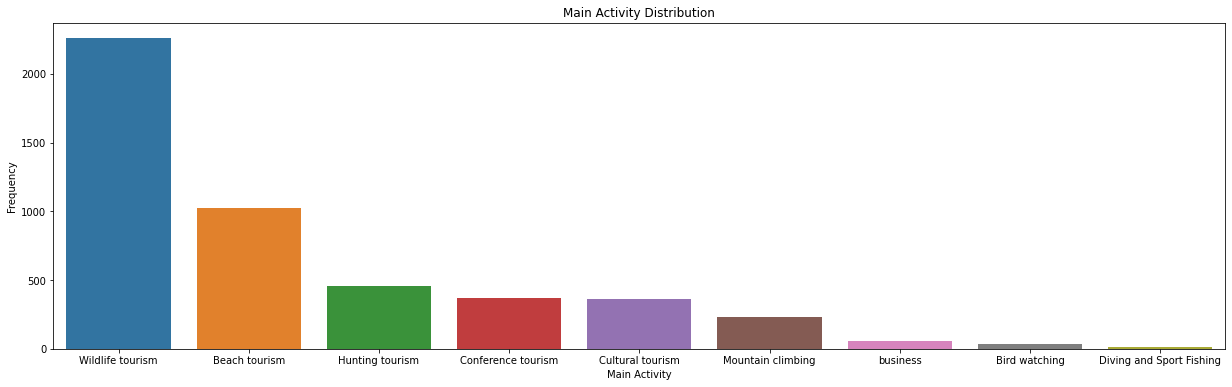

In [ ]:
plt.figure(figsize=(21,6))
ax = sns.barplot(x = df_train["main_activity"].value_counts().sort_values(ascending = False).index, y = df_train["main_activity"].value_counts().sort_values(ascending = False))
ax.set(xlabel='Main Activity', ylabel='Frequency', title ='Main Activity Distribution')

<div dir=rtl>

ניכר כי **רוב התיירים, בדאטה סט זה, מגיעים לטנזניה על מנת לראות חיות פרא**. עוד פופלארי לנפוש בחופי טנזניה ולעסוק בציד.

Text(0.5, 1.0, 'most paid main activities')

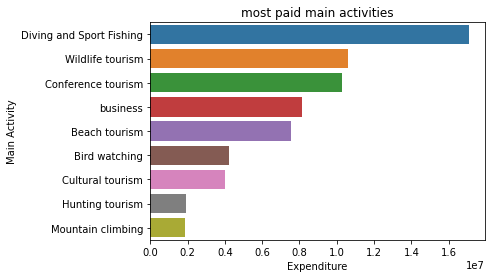

In [ ]:
fig = sns.barplot(x = df_train.groupby("main_activity")["total_cost"].mean().sort_values(ascending = False).head(10),y = df_train.groupby("main_activity")["total_cost"].mean().sort_values(ascending = False).head(10).index)
fig.set_xlabel("Expenditure")
fig.set_ylabel("Main Activity")
fig.set_title("most paid main activities")

<div dir=rtl>

ניכר כי **הפעילויות המכניסות הכי הרבה כסף (per דרישה) הינה Diving and Sport Fishing ו- Wildlife tourism**

In [ ]:
ohe = OneHotEncoder(handle_unknown='ignore')  #One-Hot encoding
main_activity_list = df['main_activity'].unique().tolist()
main_activity_list = [word for word in main_activity_list]
df_temp = pd.DataFrame(ohe.fit_transform(df[['main_activity']]).toarray())
df_temp.rename(columns=lambda i: main_activity_list[i], inplace = True)
df = df.join(df_temp)

In [ ]:
df.head(5)

,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,package_transport_int,...,Other,Wildlife tourism,Cultural tourism,Mountain climbing,Beach tourism,Conference tourism,Hunting tourism,Bird watching,business,Diving and Sport Fishing
0,SWIZERLAND,3,Friends/Relatives,1,1,Leisure and Holidays,Wildlife tourism,"Friends, relatives",Independent,No,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,UNITED KINGDOM,2,None,1,0,Leisure and Holidays,Cultural tourism,others,Independent,No,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,UNITED KINGDOM,2,Alone,0,1,Visiting Friends and Relatives,Cultural tourism,"Friends, relatives",Independent,No,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,UNITED KINGDOM,2,Spouse,1,1,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Package Tour,No,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,CHINA,1,None,1,0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Independent,No,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


<div dir=rtl>

המאפיין **info_source** הינו שדה טקסטואלי-קטגוריאלי לא היררכי אותו יש לקודד ע"פ שיטת **One-Hot encoding**.

In [ ]:
df['info_source'].unique()

array(['Friends, relatives', 'others', 'Travel, agent, tour operator',
       'Radio, TV, Web', 'Tanzania Mission Abroad', 'inflight magazines',
       'Newspaper, magazines,brochures', 'Trade fair'], dtype=object)

<div dir=rtl>

כעת אציג את התפלגות המאפיין info_source:


[Text(0, 0.5, 'Frequency'),
 Text(0.5, 0, 'Info Source'),
 Text(0.5, 1.0, 'Info Source Distribution')]

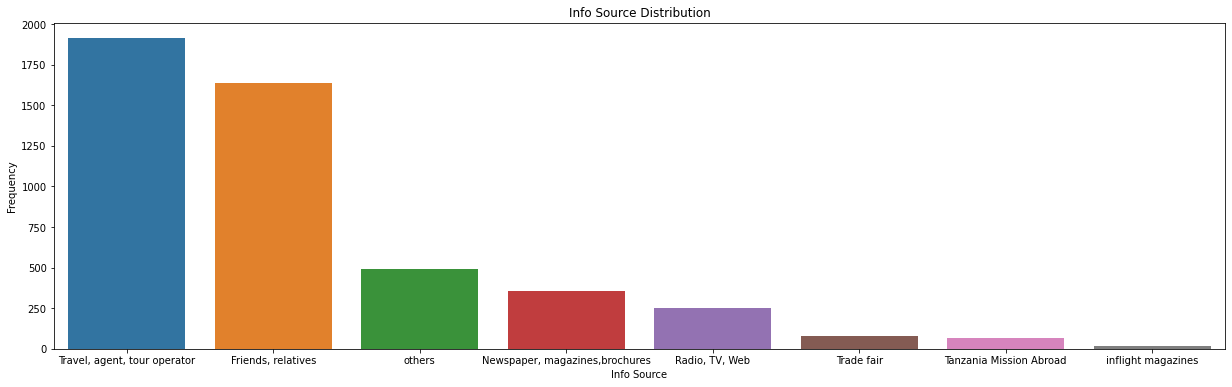

In [ ]:
plt.figure(figsize=(21,6))
ax = sns.barplot(x = df_train["info_source"].value_counts().sort_values(ascending = False).index, y = df_train["info_source"].value_counts().sort_values(ascending = False))
ax.set(xlabel='Info Source', ylabel='Frequency', title ='Info Source Distribution')

<div dir=rtl>

ניכר כי רוב התיירים, בדאטה סט זה, מגיעים לטנזניה לאחר שקיבלו מידע ופרטים על החופשה מסוכנויות טיולים/סוכנים/חברים או קרובים וכדומה.

Text(0.5, 1.0, 'Information Sources that lead to the greatest expenditures')

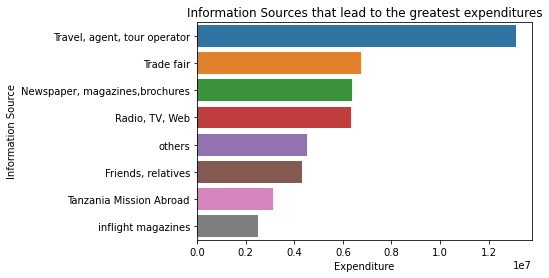

In [ ]:
fig = sns.barplot(x = df_train.groupby("info_source")["total_cost"].mean().sort_values(ascending = False).head(10),y = df_train.groupby("info_source")["total_cost"].mean().sort_values(ascending = False).head(10).index)
fig.set_xlabel("Expenditure")
fig.set_ylabel("Information Source")
fig.set_title("Information Sources that lead to the greatest expenditures")

<div dir=rtl>

ניכר כי **מקורות המידע שמניבים לתיירות טנזניה את מירב ההכנסות הן: travel,agent and tour operator**

In [ ]:
ohe = OneHotEncoder(handle_unknown='ignore')  #One-Hot encoding
info_source_list = df['info_source'].unique().tolist()
info_source_list = [word for word in info_source_list]
df_temp = pd.DataFrame(ohe.fit_transform(df[['info_source']]).toarray())
df_temp.rename(columns=lambda i: info_source_list[i], inplace = True)
df = df.join(df_temp)

In [ ]:
df.head(5)

,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,package_transport_int,...,business,Diving and Sport Fishing,"Friends, relatives",others,"Travel, agent, tour operator","Radio, TV, Web",Tanzania Mission Abroad,inflight magazines,"Newspaper, magazines,brochures",Trade fair
0,SWIZERLAND,3,Friends/Relatives,1,1,Leisure and Holidays,Wildlife tourism,"Friends, relatives",Independent,No,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,UNITED KINGDOM,2,None,1,0,Leisure and Holidays,Cultural tourism,others,Independent,No,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,UNITED KINGDOM,2,Alone,0,1,Visiting Friends and Relatives,Cultural tourism,"Friends, relatives",Independent,No,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,UNITED KINGDOM,2,Spouse,1,1,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Package Tour,No,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,CHINA,1,None,1,0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Independent,No,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


<div dir=rtl>

המאפיין **tour_arrangement** הינו שדה טקסטואלי-קטגוריאלי לא היררכי אותו יש לקודד ע"פ שיטת **One-Hot encoding**.

In [ ]:
df['tour_arrangement'].unique()

array(['Independent', 'Package Tour'], dtype=object)

<div dir=rtl>

כעת אציג את התפלגות המאפיין tour_arrangement:


[Text(0, 0.5, 'Frequency'),
 Text(0.5, 0, 'Tour Arrangement'),
 Text(0.5, 1.0, 'Tour Arrangement Distribution')]

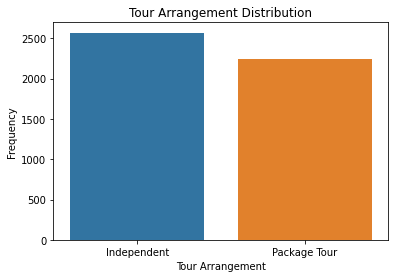

In [ ]:
ax = sns.barplot(x = df_train["tour_arrangement"].value_counts().sort_values(ascending = False).index, y = df_train["tour_arrangement"].value_counts().sort_values(ascending = False))
ax.set(xlabel='Tour Arrangement', ylabel='Frequency', title ='Tour Arrangement Distribution')

<div dir=rtl>

ניכר כי רוב התיירים, בדאטה סט זה, לא לקחו חבילת תיירים אלא היו עצמאיים בטיול.

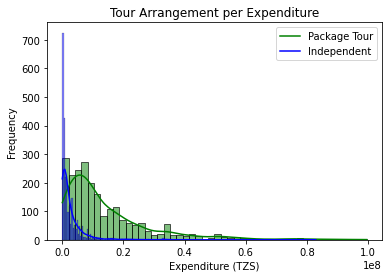

In [ ]:
fig = sns.histplot(df_train.query("tour_arrangement == 'Package Tour'")["total_cost"], color = "green",kde=True)
fig = sns.histplot(df_train.query("tour_arrangement == 'Independent'")["total_cost"], color = "blue",kde=True)
fig.legend(labels = ["Package Tour", "Independent"])
fig.set_xlabel("Expenditure (TZS)")
fig.set_ylabel("Frequency")
fig.set_title("Tour Arrangement per Expenditure")
sns.set(rc={'figure.figsize':(10,6)})

<div dir=rtl>

ניכר כי **תייר הרוכש חבילת טיול של תיירים, מבזבז משמעותית יותר כסף מאשר אם הוא מתנהל עצמאית**.

<div dir=rtl>

ניתן לראות הנ"ל מעוד זווית:

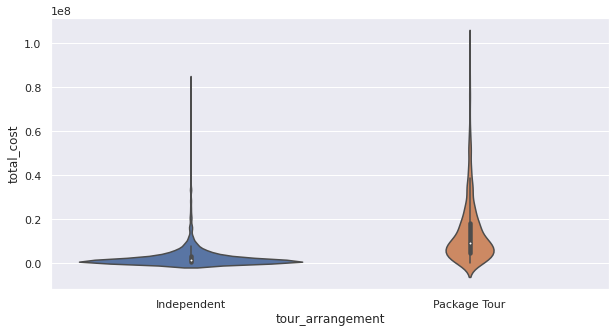

In [ ]:
plt.figure(figsize=(10,5))
sns.violinplot(data=df_train,y='total_cost',x='tour_arrangement')

In [ ]:
ohe = OneHotEncoder(handle_unknown='ignore')  #One-Hot encoding
tour_arrangement_list = df['tour_arrangement'].unique().tolist()
tour_arrangement_list = [word for word in tour_arrangement_list]
df_temp = pd.DataFrame(ohe.fit_transform(df[['tour_arrangement']]).toarray())
df_temp.rename(columns=lambda i: tour_arrangement_list[i], inplace = True)
df = df.join(df_temp)

In [ ]:
df.head(5)

,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,package_transport_int,...,"Friends, relatives",others,"Travel, agent, tour operator","Radio, TV, Web",Tanzania Mission Abroad,inflight magazines,"Newspaper, magazines,brochures",Trade fair,Independent,Package Tour
0,SWIZERLAND,3,Friends/Relatives,1,1,Leisure and Holidays,Wildlife tourism,"Friends, relatives",Independent,No,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,UNITED KINGDOM,2,None,1,0,Leisure and Holidays,Cultural tourism,others,Independent,No,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,UNITED KINGDOM,2,Alone,0,1,Visiting Friends and Relatives,Cultural tourism,"Friends, relatives",Independent,No,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,UNITED KINGDOM,2,Spouse,1,1,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Package Tour,No,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,CHINA,1,None,1,0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Independent,No,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [ ]:
df.head(5)

,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,package_transport_int,...,"Friends, relatives",others,"Travel, agent, tour operator","Radio, TV, Web",Tanzania Mission Abroad,inflight magazines,"Newspaper, magazines,brochures",Trade fair,Independent,Package Tour
0,SWIZERLAND,3,Friends/Relatives,1,1,Leisure and Holidays,Wildlife tourism,"Friends, relatives",Independent,No,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,UNITED KINGDOM,2,None,1,0,Leisure and Holidays,Cultural tourism,others,Independent,No,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,UNITED KINGDOM,2,Alone,0,1,Visiting Friends and Relatives,Cultural tourism,"Friends, relatives",Independent,No,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,UNITED KINGDOM,2,Spouse,1,1,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Package Tour,No,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,CHINA,1,None,1,0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Independent,No,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


<div dir=rtl>

המאפיין **package_transport_int** הינו שדה טקסטואלי-קטגוריאלי לא היררכי אותו יש לקודד ע"פ שיטת One-Hot encoding.<br>אף על פי כן, בשל העובדה שמשתנה זה בינארי, ניתן להשתמש בשיטת **Label encoding**, מה שאבחר עבור משתנה זה.

In [ ]:
df['package_transport_int'].unique()

array(['No', 'Yes'], dtype=object)

<div dir=rtl>

כעת אציג את התפלגות המאפיין tour_arrangement:


[Text(0, 0.5, 'Frequency'),
 Text(0.5, 0, 'Package of International Transportation'),
 Text(0.5, 1.0, 'Package of International Transportation Distribution')]

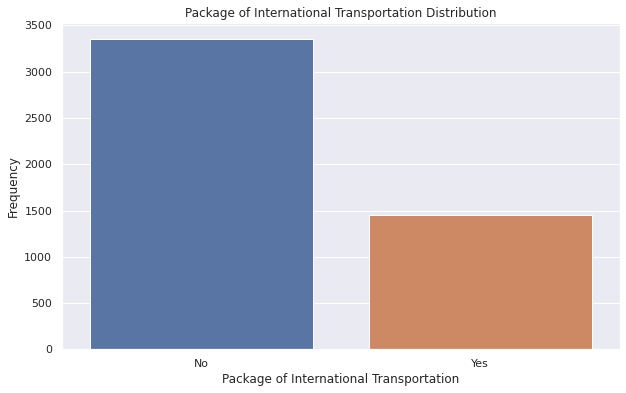

In [ ]:
ax = sns.barplot(x = df_train["package_transport_int"].value_counts().sort_values(ascending = False).index, y = df_train["package_transport_int"].value_counts().sort_values(ascending = False))
ax.set(xlabel='Package of International Transportation', ylabel='Frequency', title ='Package of International Transportation Distribution')

<div dir=rtl>

ניכר כי רוב התיירים, בדאטה סט זה, לא לקחו חבילת הסעות בינלאומית לתיירים .

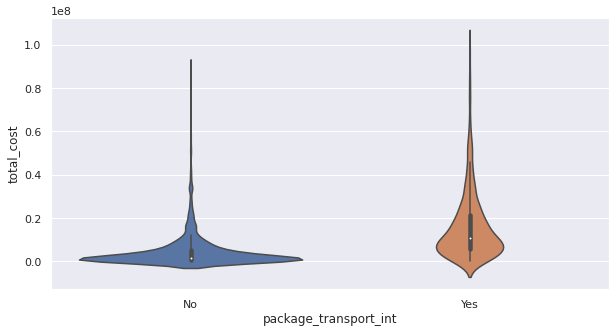

In [ ]:
plt.figure(figsize=(10,5))
sns.violinplot(data=df_train,y='total_cost',x='package_transport_int')

<div dir=rtl>

ניכר כי **תייר הרוכש חבילת הסעות בינלאומית של תיירים, מבזבז משמעותית יותר כסף מאשר אם הוא רוכש עצמאית**.

In [ ]:
le= LabelEncoder()
df['package_transport_int'] = le.fit_transform(df['package_transport_int'])

In [ ]:
df.head(5)

,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,package_transport_int,...,"Friends, relatives",others,"Travel, agent, tour operator","Radio, TV, Web",Tanzania Mission Abroad,inflight magazines,"Newspaper, magazines,brochures",Trade fair,Independent,Package Tour
0,SWIZERLAND,3,Friends/Relatives,1,1,Leisure and Holidays,Wildlife tourism,"Friends, relatives",Independent,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,UNITED KINGDOM,2,None,1,0,Leisure and Holidays,Cultural tourism,others,Independent,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,UNITED KINGDOM,2,Alone,0,1,Visiting Friends and Relatives,Cultural tourism,"Friends, relatives",Independent,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,UNITED KINGDOM,2,Spouse,1,1,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Package Tour,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,CHINA,1,None,1,0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Independent,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


<div dir=rtl>

המאפיין **package_accomodation** הינו שדה טקסטואלי-קטגוריאלי לא היררכי אותו יש לקודד ע"פ שיטת One-Hot encoding.<br>אף על פי כן, בשל העובדה שמשתנה זה בינארי, ניתן להשתמש בשיטת **Label encoding**, מה שאבחר עבור משתנה זה.

In [ ]:
df['package_accomodation'].unique()

array(['No', 'Yes'], dtype=object)

<div dir=rtl>

כעת אציג את התפלגות המאפיין package_accomodation:


[Text(0, 0.5, 'Frequency'),
 Text(0.5, 0, 'Accomodation Package'),
 Text(0.5, 1.0, 'Accomodation Package Distribution')]

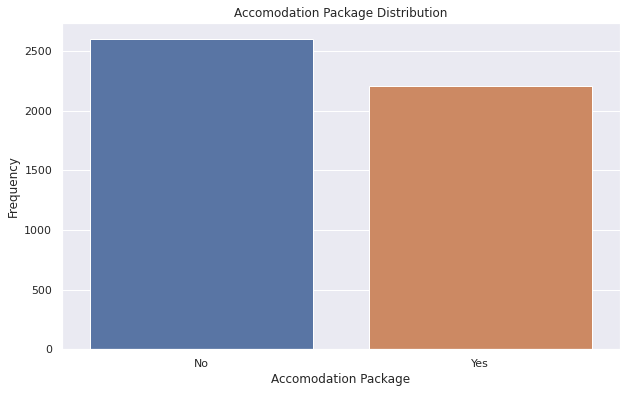

In [ ]:
ax = sns.barplot(x = df_train["package_accomodation"].value_counts().sort_values(ascending = False).index, y = df_train["package_accomodation"].value_counts().sort_values(ascending = False))
ax.set(xlabel='Accomodation Package', ylabel='Frequency', title ='Accomodation Package Distribution')

<div dir=rtl>

ניכר כי רוב התיירים, בדאטה סט זה, לא לקחו חבילת לינה לתיירים.

Text(0.5, 1.0, 'Accomodation Package per Expenditure')

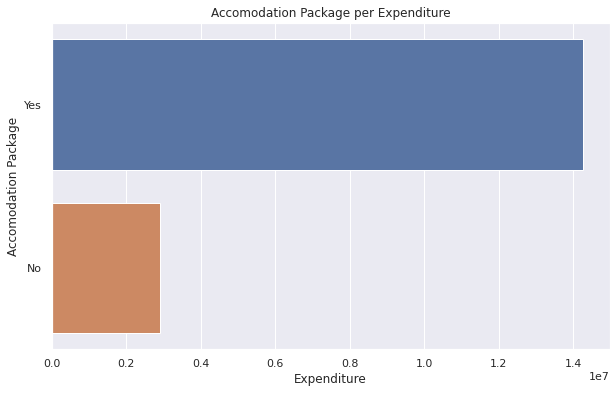

In [ ]:
fig = sns.barplot(x = df_train.groupby("package_accomodation")["total_cost"].mean().sort_values(ascending = False).head(2),y = df_train.groupby("package_accomodation")["total_cost"].mean().sort_values(ascending = False).head(2).index)
fig.set_xlabel("Expenditure")
fig.set_ylabel("Accomodation Package")
fig.set_title("Accomodation Package per Expenditure")

<div dir=rtl>

ניכר כי **תייר הרוכש חבילת לינה של תיירים, מבזבז, בממוצע, משמעותית יותר כסף מאשר אם הוא מתנהל עצמאית או רוכש עצמאית**.

In [ ]:
le= LabelEncoder()
df['package_accomodation'] = le.fit_transform(df['package_accomodation'])

In [ ]:
df.head(5)

,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,package_transport_int,...,"Friends, relatives",others,"Travel, agent, tour operator","Radio, TV, Web",Tanzania Mission Abroad,inflight magazines,"Newspaper, magazines,brochures",Trade fair,Independent,Package Tour
0,SWIZERLAND,3,Friends/Relatives,1,1,Leisure and Holidays,Wildlife tourism,"Friends, relatives",Independent,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,UNITED KINGDOM,2,None,1,0,Leisure and Holidays,Cultural tourism,others,Independent,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,UNITED KINGDOM,2,Alone,0,1,Visiting Friends and Relatives,Cultural tourism,"Friends, relatives",Independent,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,UNITED KINGDOM,2,Spouse,1,1,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Package Tour,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,CHINA,1,None,1,0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Independent,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


<div dir=rtl>

המאפיין **package_food** הינו שדה טקסטואלי-קטגוריאלי לא היררכי אותו יש לקודד ע"פ שיטת One-Hot encoding.<br>אף על פי כן, בשל העובדה שמשתנה זה בינארי, ניתן להשתמש בשיטת **Label encoding**, מה שאבחר עבור משתנה זה.

In [ ]:
df['package_food'].unique()

array(['No', 'Yes'], dtype=object)

<div dir=rtl>

כעת אציג את התפלגות המאפיין package_food:


[Text(0, 0.5, 'Frequency'),
 Text(0.5, 0, 'Food Package'),
 Text(0.5, 1.0, 'Food Package Distribution')]

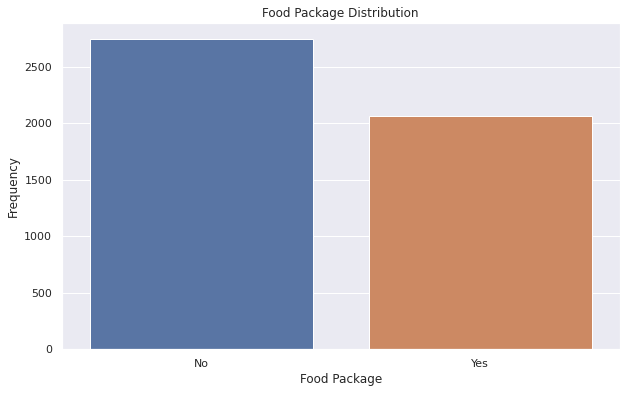

In [ ]:
ax = sns.barplot(x = df_train["package_food"].value_counts().sort_values(ascending = False).index, y = df_train["package_food"].value_counts().sort_values(ascending = False))
ax.set(xlabel='Food Package', ylabel='Frequency', title ='Food Package Distribution')

<div dir=rtl>

ניכר כי רוב התיירים, בדאטה סט זה, לא לקחו חבילת הסעדה לתיירים.

Text(0.5, 1.0, 'Food Package per Expenditure')

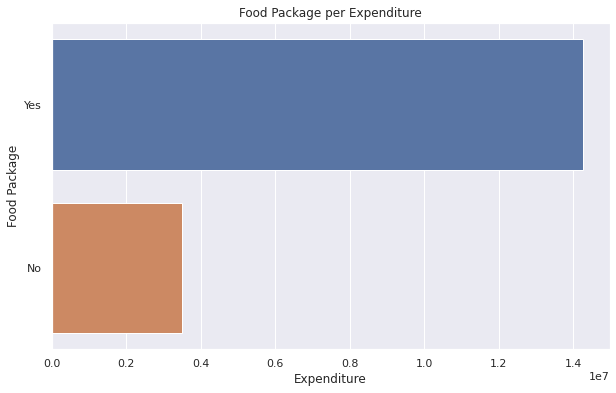

In [ ]:
fig = sns.barplot(x = df_train.groupby("package_food")["total_cost"].mean().sort_values(ascending = False).head(2),y = df_train.groupby("package_food")["total_cost"].mean().sort_values(ascending = False).head(2).index)
fig.set_xlabel("Expenditure")
fig.set_ylabel("Food Package")
fig.set_title("Food Package per Expenditure")

<div dir=rtl>

ניכר כי **תייר הרוכש חבילת הסעדה של תיירים, מבזבז, בממוצע, משמעותית יותר כסף מאשר אם הוא רוכש עצמאית או מבשל בעצמו**.

In [ ]:
le = LabelEncoder()
df['package_food'] = le.fit_transform(df['package_food'])

In [ ]:
df.head(5)

,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,package_transport_int,...,"Friends, relatives",others,"Travel, agent, tour operator","Radio, TV, Web",Tanzania Mission Abroad,inflight magazines,"Newspaper, magazines,brochures",Trade fair,Independent,Package Tour
0,SWIZERLAND,3,Friends/Relatives,1,1,Leisure and Holidays,Wildlife tourism,"Friends, relatives",Independent,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,UNITED KINGDOM,2,None,1,0,Leisure and Holidays,Cultural tourism,others,Independent,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,UNITED KINGDOM,2,Alone,0,1,Visiting Friends and Relatives,Cultural tourism,"Friends, relatives",Independent,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,UNITED KINGDOM,2,Spouse,1,1,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Package Tour,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,CHINA,1,None,1,0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Independent,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


<div dir=rtl>

המאפיין **package_transport_tz** הינו שדה טקסטואלי-קטגוריאלי לא היררכי אותו יש לקודד ע"פ שיטת One-Hot encoding.<br>אף על פי כן, בשל העובדה שמשתנה זה בינארי, ניתן להשתמש בשיטת **Label encoding**, מה שאבחר עבור משתנה זה.

In [ ]:
df['package_transport_tz'].unique()

array(['No', 'Yes'], dtype=object)

<div dir=rtl>

כעת אציג את התפלגות המאפיין package_transport_tz:


[Text(0, 0.5, 'Frequency'),
 Text(0.5, 0, 'Transportation package within Tanzania'),
 Text(0.5, 1.0, 'Transportation package within Tanzania Distribution')]

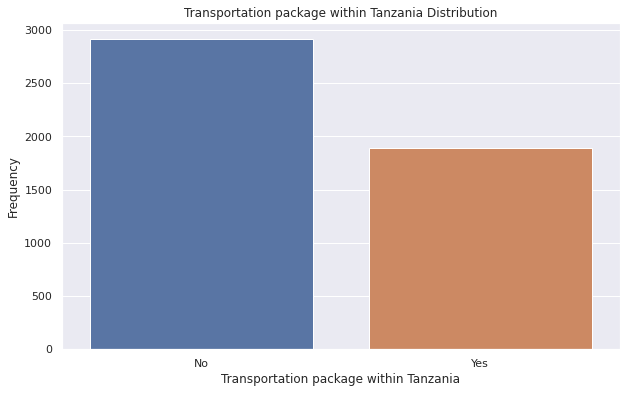

In [ ]:
ax = sns.barplot(x = df_train["package_transport_tz"].value_counts().sort_values(ascending = False).index, y = df_train["package_transport_tz"].value_counts().sort_values(ascending = False))
ax.set(xlabel='Transportation package within Tanzania', ylabel='Frequency', title ='Transportation package within Tanzania Distribution')

<div dir=rtl>

ניכר כי רוב התיירים, בדאטה סט זה, לא לקחו חבילת ההסעות לתיירים בתוך טנזניה.

Text(0.5, 1.0, 'Transportation package within Tanzania per Expenditure')

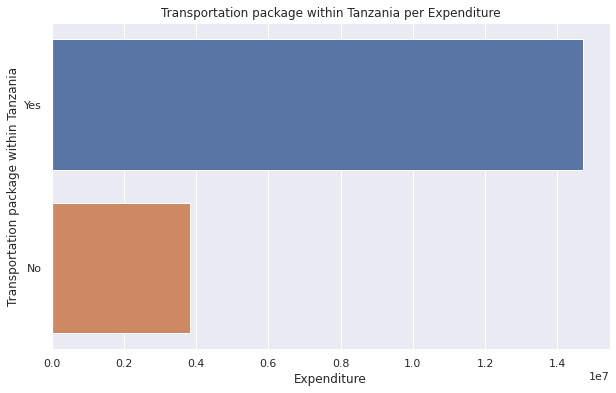

In [ ]:
fig = sns.barplot(x = df_train.groupby("package_transport_tz")["total_cost"].mean().sort_values(ascending = False).head(2),y = df_train.groupby("package_transport_tz")["total_cost"].mean().sort_values(ascending = False).head(2).index)
fig.set_xlabel("Expenditure")
fig.set_ylabel("Transportation package within Tanzania")
fig.set_title("Transportation package within Tanzania per Expenditure")

<div dir=rtl>

ניכר כי **תייר הרוכש חבילת הסעות בתוך טנזניה, של תיירים, מבזבז בממוצע, משמעותית יותר כסף מאשר אם הוא רוכש עצמאית או מתנייד עצמאית**.

In [ ]:
le = LabelEncoder()
df['package_transport_tz'] = le.fit_transform(df['package_transport_tz'])

In [ ]:
df.head(5)

,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,package_transport_int,...,"Friends, relatives",others,"Travel, agent, tour operator","Radio, TV, Web",Tanzania Mission Abroad,inflight magazines,"Newspaper, magazines,brochures",Trade fair,Independent,Package Tour
0,SWIZERLAND,3,Friends/Relatives,1,1,Leisure and Holidays,Wildlife tourism,"Friends, relatives",Independent,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,UNITED KINGDOM,2,None,1,0,Leisure and Holidays,Cultural tourism,others,Independent,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,UNITED KINGDOM,2,Alone,0,1,Visiting Friends and Relatives,Cultural tourism,"Friends, relatives",Independent,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,UNITED KINGDOM,2,Spouse,1,1,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Package Tour,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,CHINA,1,None,1,0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Independent,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


<div dir=rtl>

המאפיין **package_sightseeing** הינו שדה טקסטואלי-קטגוריאלי לא היררכי אותו יש לקודד ע"פ שיטת One-Hot encoding.
<br>אף על פי כן, בשל העובדה שמשתנה זה בינארי, ניתן להשתמש בשיטת **Label encoding**, מה שאבחר עבור משתנה זה.

In [ ]:
df['package_sightseeing'].unique()

array(['No', 'Yes'], dtype=object)

<div dir=rtl>

כעת אציג את התפלגות המאפיין package_sightseeing:


[Text(0, 0.5, 'Frequency'),
 Text(0.5, 0, 'Sightseeing Package'),
 Text(0.5, 1.0, 'Sightseeing Package Distribution')]

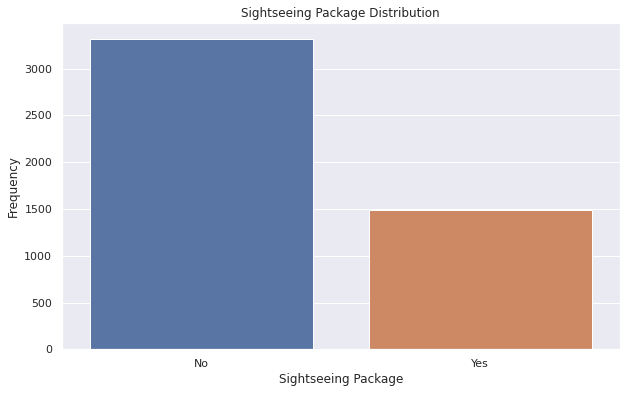

In [ ]:
ax = sns.barplot(x = df_train["package_sightseeing"].value_counts().sort_values(ascending = False).index, y = df_train["package_sightseeing"].value_counts().sort_values(ascending = False))
ax.set(xlabel='Sightseeing Package', ylabel='Frequency', title ='Sightseeing Package Distribution')

<div dir=rtl>

ניכר כי רוב התיירים, בדאטה סט זה, לא לקחו חבילת סיור באתרים, לתיירים בטנזניה.

Text(0.5, 1.0, 'Sightseeing Package per Expenditure')

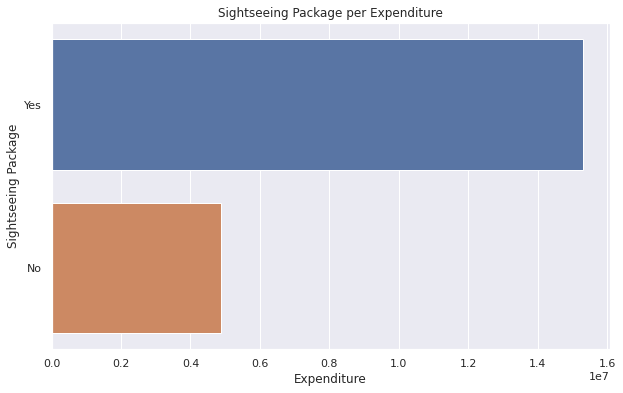

In [ ]:
fig = sns.barplot(x = df_train.groupby("package_sightseeing")["total_cost"].mean().sort_values(ascending = False).head(2),y = df_train.groupby("package_sightseeing")["total_cost"].mean().sort_values(ascending = False).head(2).index)
fig.set_xlabel("Expenditure")
fig.set_ylabel("Sightseeing Package")
fig.set_title("Sightseeing Package per Expenditure")

<div dir=rtl>

ניכר כי **תייר הרוכש חבילת סיור באתרים בתוך טנזניה, של תיירים, מבזבז בממוצע, משמעותית יותר כסף מאשר אם הוא רוכש עצמאית**.

In [ ]:
le = LabelEncoder()
df['package_sightseeing'] = le.fit_transform(df['package_sightseeing'])

In [ ]:
df.head(5)

,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,package_transport_int,...,"Friends, relatives",others,"Travel, agent, tour operator","Radio, TV, Web",Tanzania Mission Abroad,inflight magazines,"Newspaper, magazines,brochures",Trade fair,Independent,Package Tour
0,SWIZERLAND,3,Friends/Relatives,1,1,Leisure and Holidays,Wildlife tourism,"Friends, relatives",Independent,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,UNITED KINGDOM,2,None,1,0,Leisure and Holidays,Cultural tourism,others,Independent,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,UNITED KINGDOM,2,Alone,0,1,Visiting Friends and Relatives,Cultural tourism,"Friends, relatives",Independent,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,UNITED KINGDOM,2,Spouse,1,1,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Package Tour,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,CHINA,1,None,1,0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Independent,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


<div dir=rtl>

המאפיין **package_guided_tour** הינו שדה טקסטואלי-קטגוריאלי לא היררכי אותו יש לקודד ע"פ שיטת One-Hot encoding.<br>אף על פי כן, בשל העובדה שמשתנה זה בינארי, ניתן להשתמש בשיטת **Label encoding**, מה שאבחר עבור משתנה זה.

In [ ]:
df['package_guided_tour'].unique()

array(['No', 'Yes'], dtype=object)

<div dir=rtl>

כעת אציג את התפלגות המאפיין package_guided_tour:


[Text(0, 0.5, 'Frequency'),
 Text(0.5, 0, 'Guided Tour Package'),
 Text(0.5, 1.0, 'Guided Tour Package Distribution')]

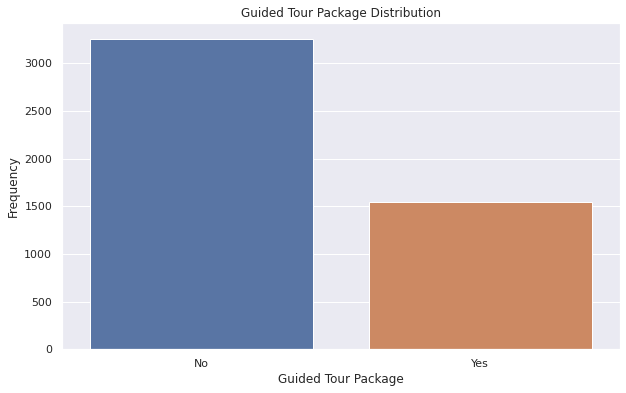

In [ ]:
ax = sns.barplot(x = df_train["package_guided_tour"].value_counts().sort_values(ascending = False).index, y = df_train["package_guided_tour"].value_counts().sort_values(ascending = False))
ax.set(xlabel='Guided Tour Package', ylabel='Frequency', title ='Guided Tour Package Distribution')

<div dir=rtl>

ניכר כי רוב התיירים, בדאטה סט זה, לא לקחו חבילת טיול המכילה מדריך טיול.

Text(0.5, 1.0, 'Guided Tour Package per Expenditure')

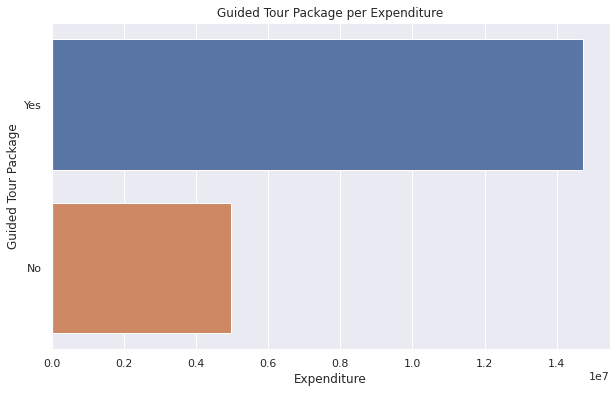

In [ ]:
fig = sns.barplot(x = df_train.groupby("package_guided_tour")["total_cost"].mean().sort_values(ascending = False).head(2),y = df_train.groupby("package_guided_tour")["total_cost"].mean().sort_values(ascending = False).head(2).index)
fig.set_xlabel("Expenditure")
fig.set_ylabel("Guided Tour Package")
fig.set_title("Guided Tour Package per Expenditure")

<div dir=rtl>

ניכר כי **תייר הרוכש חבילת טיול, מבזבז בממוצע, משמעותית יותר כסף מאשר אם הוא מטייל ללא מדריך**.

In [ ]:
le = LabelEncoder()
df['package_guided_tour'] = le.fit_transform(df['package_guided_tour'])

In [ ]:
df.head(5)

,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,package_transport_int,...,"Friends, relatives",others,"Travel, agent, tour operator","Radio, TV, Web",Tanzania Mission Abroad,inflight magazines,"Newspaper, magazines,brochures",Trade fair,Independent,Package Tour
0,SWIZERLAND,3,Friends/Relatives,1,1,Leisure and Holidays,Wildlife tourism,"Friends, relatives",Independent,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,UNITED KINGDOM,2,None,1,0,Leisure and Holidays,Cultural tourism,others,Independent,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,UNITED KINGDOM,2,Alone,0,1,Visiting Friends and Relatives,Cultural tourism,"Friends, relatives",Independent,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,UNITED KINGDOM,2,Spouse,1,1,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Package Tour,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,CHINA,1,None,1,0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Independent,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


<div dir=rtl>

המאפיין **package_insurance** הינו שדה טקסטואלי-קטגוריאלי לא היררכי אותו יש לקודד ע"פ שיטת One-Hot encoding.<br>אף על פי כן, בשל העובדה שמשתנה זה בינארי, ניתן להשתמש בשיטת **Label encoding**, מה שאבחר עבור משתנה זה.

In [ ]:
df['package_insurance'].unique()

array(['No', 'Yes'], dtype=object)

<div dir=rtl>

כעת אציג את התפלגות המאפיין package_insurance:


[Text(0, 0.5, 'Frequency'),
 Text(0.5, 0, 'Insurance Package'),
 Text(0.5, 1.0, 'Insurance Package Distribution')]

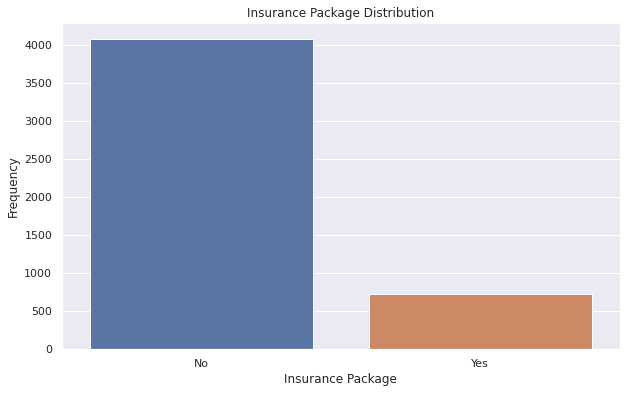

In [ ]:
ax = sns.barplot(x = df_train["package_insurance"].value_counts().sort_values(ascending = False).index, y = df_train["package_insurance"].value_counts().sort_values(ascending = False))
ax.set(xlabel='Insurance Package', ylabel='Frequency', title ='Insurance Package Distribution')

<div dir=rtl>

ניכר כי רוב התיירים, בדאטה סט זה, לא לקחו חבילת ביטוח לתייר.

Text(0.5, 1.0, 'Insurance Package per Expenditure')

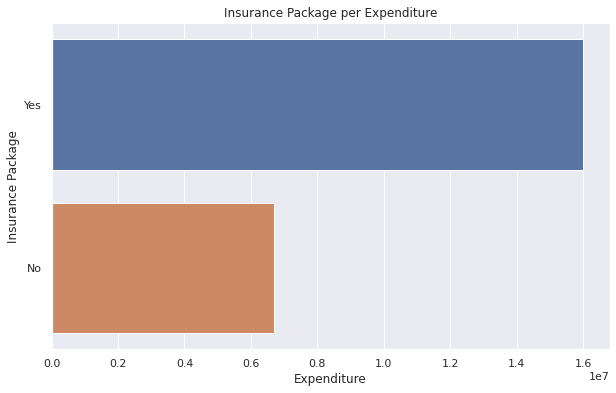

In [ ]:
fig = sns.barplot(x = df_train.groupby("package_insurance")["total_cost"].mean().sort_values(ascending = False).head(2),y = df_train.groupby("package_insurance")["total_cost"].mean().sort_values(ascending = False).head(2).index)
fig.set_xlabel("Expenditure")
fig.set_ylabel("Insurance Package")
fig.set_title("Insurance Package per Expenditure")

<div dir=rtl>

ניכר כי **תייר הרוכש חבילת ביטוח לתיירים, מבזבז בממוצע, משמעותית יותר כסף מאשר אם הוא מבטח עצמו עצמאית**.

In [ ]:
le = LabelEncoder()
df['package_insurance'] = le.fit_transform(df['package_insurance'])

In [ ]:
df.head(5)

,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,package_transport_int,...,"Friends, relatives",others,"Travel, agent, tour operator","Radio, TV, Web",Tanzania Mission Abroad,inflight magazines,"Newspaper, magazines,brochures",Trade fair,Independent,Package Tour
0,SWIZERLAND,3,Friends/Relatives,1,1,Leisure and Holidays,Wildlife tourism,"Friends, relatives",Independent,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,UNITED KINGDOM,2,None,1,0,Leisure and Holidays,Cultural tourism,others,Independent,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,UNITED KINGDOM,2,Alone,0,1,Visiting Friends and Relatives,Cultural tourism,"Friends, relatives",Independent,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,UNITED KINGDOM,2,Spouse,1,1,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Package Tour,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,CHINA,1,None,1,0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Independent,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


<div dir=rtl>

את כל המאפיינים המכילים חבילות כלשהן, אחבר לכדי פיצ'ר אחד שנקרא **total_package**, שאולי יעניק מידע חדש שיעזור למודל:

In [ ]:
df["total_package"] = df["package_transport_int"]+df["package_transport_tz"]+df["package_guided_tour"]+df["package_insurance"]+df["package_sightseeing"] + df['package_accomodation']+ df['package_food']

<div dir=rtl>

המאפיין **night_mainland** הינו שדה נומרי.

In [ ]:
df['night_mainland'].unique()

array([ 13.,  14.,   1.,  11.,   7.,   9.,  10.,   4.,   5.,  17.,  30.,
         2.,   0.,  24.,   3.,  70.,  20.,  15.,  56.,  12.,   6.,  21.,
        29.,  27.,  34.,  60.,  22., 120.,  50.,  45.,  90.,  42.,  35.,
        36.,  43.,  16.,  19.,  66.,  31.,  23.,  33.,  61.,  37.,  25.,
        32.,  69.,  40.,  46.,  47., 130.,  59.,  41.,  63.,  54.,  51.,
        39.,  26.,  64.,  49.,  55.,  75.,  65.,  53., 145.,  62., 160.,
        44., 664.,  57.])

In [ ]:
df_train['night_mainland'] = df_train['night_mainland'].astype('int')

<div dir=rtl>

כעת אציג את התפלגות המאפיין night_mainland:


<function matplotlib.pyplot.show(*args, **kw)>

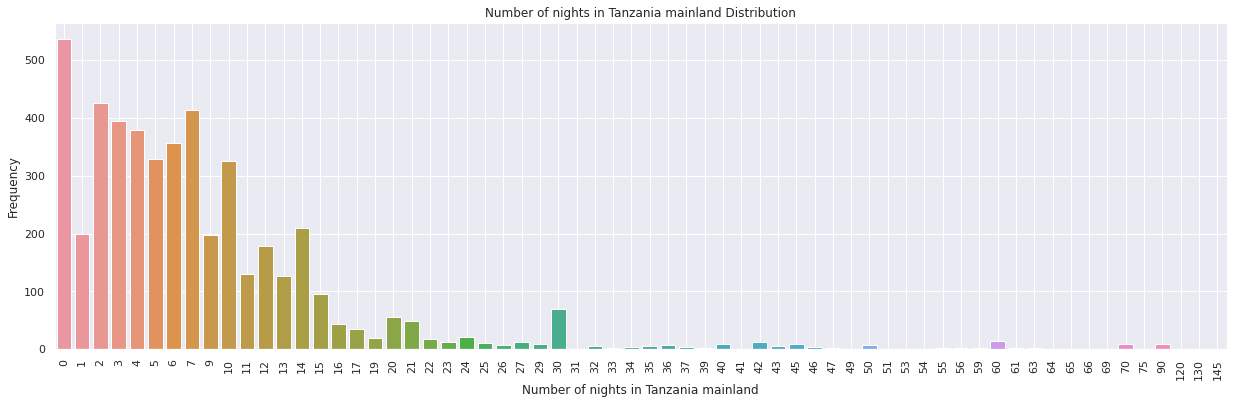

In [ ]:
plt.figure(figsize=(21,6))
ax=sns.countplot(x="night_mainland",data=df_train)
ax.set(xlabel='Number of nights in Tanzania mainland', ylabel='Frequency', title ='Number of nights in Tanzania mainland Distribution')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.grid(True)
plt.show

<div dir=rtl>

ניכר כי ישנם לא מעט תיירים הבוחרים לא לבלות בmainland של טנזניה אף לא יום אחד. רוב שאר התיירים בוחרים לבלות באיזור זה בין יום אחד לשבועיים.

Text(0.5, 1.0, 'Number of nights in Tanzania mainland that lead to the greatest expenditures')

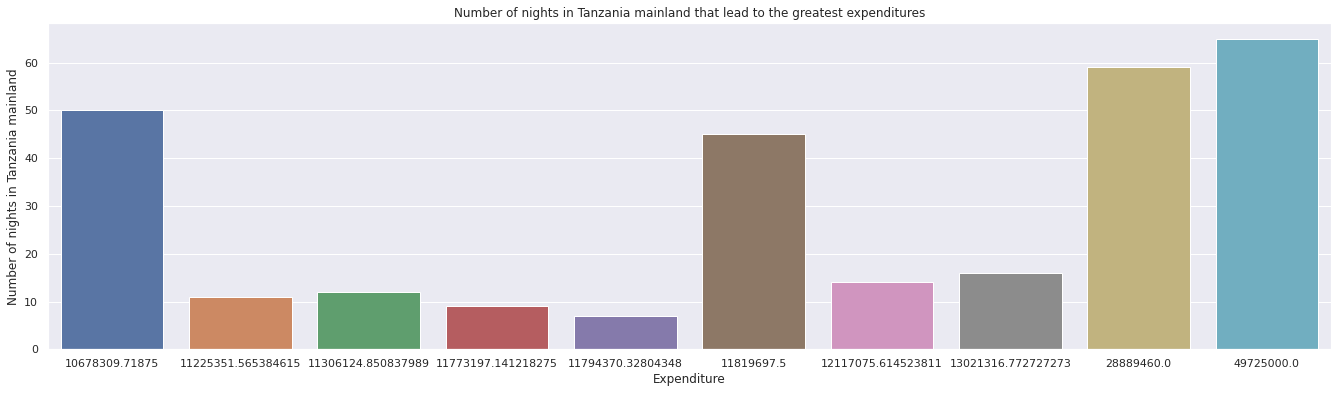

In [ ]:
plt.figure(figsize=(23,6))
fig = sns.barplot(x = df_train.groupby("night_mainland")["total_cost"].mean().sort_values(ascending = False).head(10),y = df_train.groupby("night_mainland")["total_cost"].mean().sort_values(ascending = False).head(10).index)
fig.set_xlabel("Expenditure")
fig.set_ylabel("Number of nights in Tanzania mainland")
fig.set_title("Number of nights in Tanzania mainland that lead to the greatest expenditures")

<div dir=rtl>

ניתן לראות שאין מגמה ברורה ולינארית האומרת שככל שמבלים מספר ימים גדול יותר בmainland של טנזניה, כך משלמים יותר (אולי אומר משהו על חוסר היציבות של פיצ'ר זה או אולי מרמז על כך שאם לנים יותר באיזור מסוים, אולי ישנם דילים ארוכי טווח שדווקא מוזילים את השהייה).

<div dir=rtl>

המאפיין **night_zanzibar** הינו שדה נומרי.

In [ ]:
df['night_zanzibar'].unique()

array([  0.,   7.,  31.,   4.,   3.,   2.,  11.,   6.,   5.,  10.,   1.,
        30.,  13.,   9.,  15.,  21.,  14.,  12.,  25.,  35.,  60.,  16.,
        19.,  24.,  27.,  17.,  22.,  43.,  33.,  23.,  26.,  50.,  61.,
        20., 100.,  42., 174.])

In [ ]:
df['night_zanzibar'] = df['night_zanzibar'].astype('int')

<div dir=rtl>

כעת אציג את התפלגות המאפיין night_zanzibar:


<function matplotlib.pyplot.show(*args, **kw)>

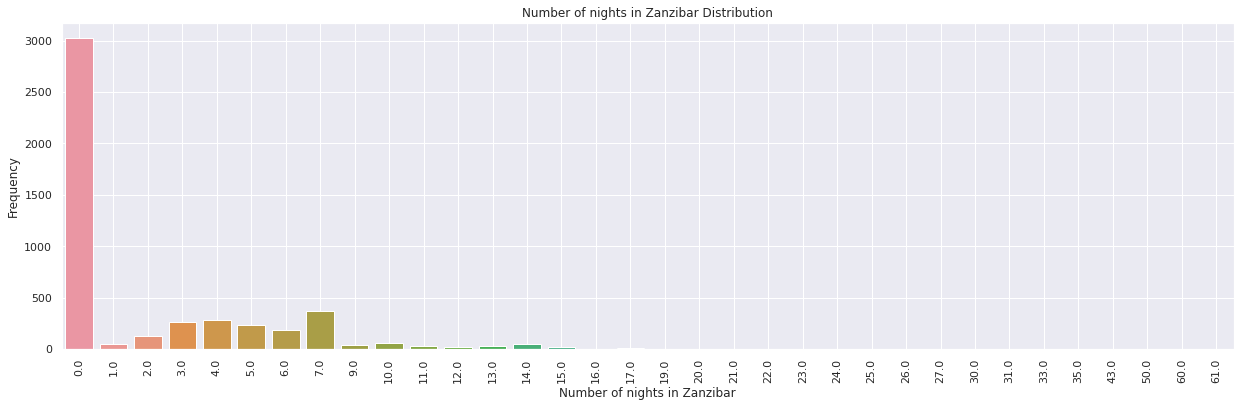

In [ ]:
plt.figure(figsize=(21,6))
ax=sns.countplot(x="night_zanzibar",data=df_train)
ax.set(xlabel='Number of nights in Zanzibar', ylabel='Frequency', title ='Number of nights in Zanzibar Distribution')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.grid(True)
plt.show

<div dir=rtl>

**ניכר כי הרוב המוחלט של התיירים בטנזניה, לא לנים כלל באי זנזיבר**. מי שכן בוחר ללון באי זה, לרוב לן שם עד שבוע ימים, וישנם חריגים שיכולים ללון שם עד חודשיים.

Text(0.5, 1.0, 'Number of nights in Zanzibar that lead to the greatest expenditures')

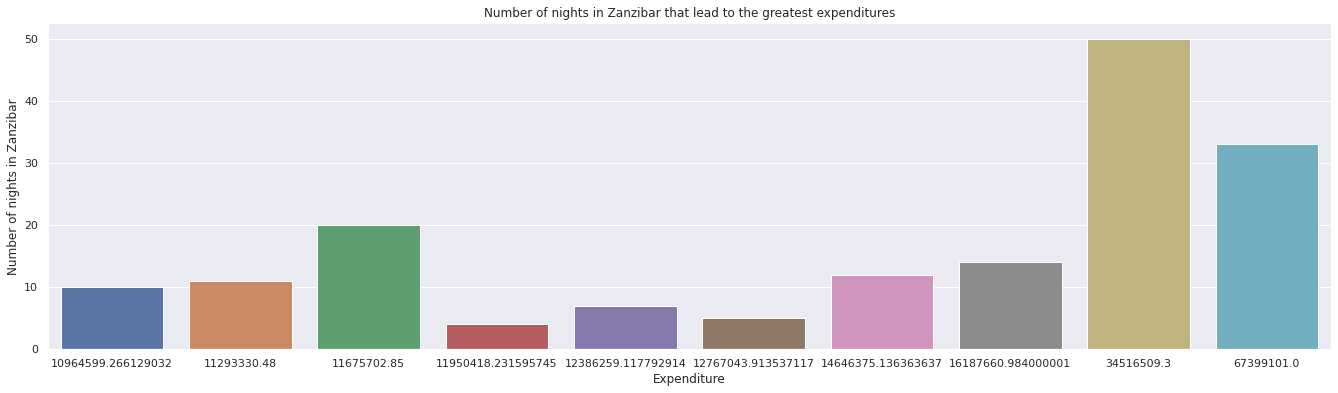

In [ ]:
plt.figure(figsize=(23,6))
fig = sns.barplot(x = df_train.groupby("night_zanzibar")["total_cost"].mean().sort_values(ascending = False).head(10),y = df_train.groupby("night_zanzibar")["total_cost"].mean().sort_values(ascending = False).head(10).index)
fig.set_xlabel("Expenditure")
fig.set_ylabel("Number of nights in Zanzibar")
fig.set_title("Number of nights in Zanzibar that lead to the greatest expenditures")

<div dir=rtl>

ניתן לראות שאין מגמה ברורה ולינארית האומרת שככל שמבלים מספר ימים גדול יותר בZanzibar, כך משלמים יותר (אולי אומר משהו על חוסר היציבות של פיצ'ר זה או אולי מרמז על כך שאם לנים יותר באיזור מסוים, אולי ישנם דילים ארוכי טווח שדווקא מוזילים את השהייה).

<div dir=rtl>

את שני המאפיינים, **night_mainland** ו- **night_zanzibar**, ניתן לחבר לכדי משתנה חדש בשם **total_nights** שאולי יעניק מידע חדש שיעזור למודל:

In [ ]:
df["total_nights"] = df["night_mainland"] + df["night_zanzibar"]

<div dir=rtl>

המאפיין **payment_mode** הינו שדה טקסטואלי-קטגוריאלי לא היררכי ועל כן אקודד אותו ע"פ שיטת **One-Hot encoding**.

In [ ]:
df['payment_mode'].unique()

array(['Cash', 'Credit Card', 'Other', 'Travellers Cheque'], dtype=object)

<div dir=rtl>

כעת אציג את התפלגות המאפיין payment_mode:


<function matplotlib.pyplot.show(*args, **kw)>

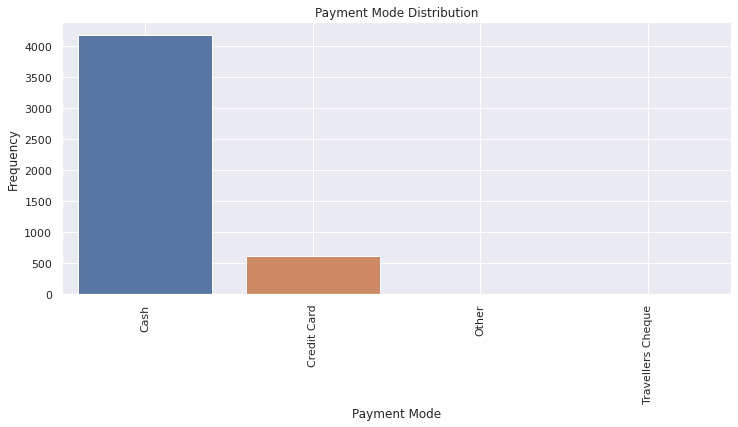

In [ ]:
plt.figure(figsize=(12,5))
ax=sns.countplot(x="payment_mode",data=df_train)
ax.set(xlabel='Payment Mode', ylabel='Frequency', title ='Payment Mode Distribution')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.grid(True)
plt.show

<div dir=rtl>

ניתן לראות ש**רובו המחולט של התיירים בטנזניה, משלמים במזומן או עם כרטיס אשראי**. מעטים מאוד משתמשים בצ'ק של מטיילים או באמצעי תשלום אחר.

Text(0.5, 1.0, 'most profit out of Payment mode kinds')

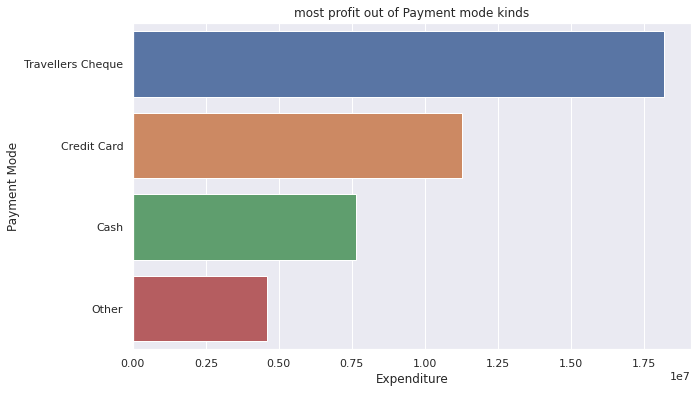

In [ ]:
fig = sns.barplot(x = df_train.groupby("payment_mode")["total_cost"].mean().sort_values(ascending = False).head(4),y = df_train.groupby("payment_mode")["total_cost"].mean().sort_values(ascending = False).head(4).index)
fig.set_xlabel("Expenditure")
fig.set_ylabel("Payment Mode")
fig.set_title("most profit out of Payment mode kinds")

<div dir=rtl>

**ניכר כי אמצעי התשלום המניבים ביותר בממוצע, הינם הצ'ק וכרטיס האשראי**.

In [ ]:
ohe = OneHotEncoder(handle_unknown='ignore')
payment_mode_list = df['payment_mode'].unique().tolist()
payment_mode_list = ['payment_mode_' + word for word in payment_mode_list]
df_temp = pd.DataFrame(ohe.fit_transform(df[['payment_mode']]).toarray())
df_temp.rename(columns=lambda i: payment_mode_list[i], inplace = True)
df = df.join(df_temp)

In [ ]:
df.head(5)

,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,package_transport_int,...,"Newspaper, magazines,brochures",Trade fair,Independent,Package Tour,total_package,total_nights,payment_mode_Cash,payment_mode_Credit Card,payment_mode_Other,payment_mode_Travellers Cheque
0,SWIZERLAND,3,Friends/Relatives,1,1,Leisure and Holidays,Wildlife tourism,"Friends, relatives",Independent,0,...,0.0,0.0,1.0,0.0,0,13.0,1.0,0.0,0.0,0.0
1,UNITED KINGDOM,2,None,1,0,Leisure and Holidays,Cultural tourism,others,Independent,0,...,0.0,1.0,1.0,0.0,0,21.0,1.0,0.0,0.0,0.0
2,UNITED KINGDOM,2,Alone,0,1,Visiting Friends and Relatives,Cultural tourism,"Friends, relatives",Independent,0,...,0.0,0.0,1.0,0.0,0,32.0,1.0,0.0,0.0,0.0
3,UNITED KINGDOM,2,Spouse,1,1,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Package Tour,0,...,0.0,0.0,0.0,1.0,5,11.0,1.0,0.0,0.0,0.0
4,CHINA,1,None,1,0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Independent,0,...,0.0,0.0,1.0,0.0,0,11.0,1.0,0.0,0.0,0.0


<div dir=rtl>

המאפיין **first_trip_tz** הינו שדה טקסטואלי-קטגוריאלי לא היררכי אותו יש לקודד ע"פ שיטת One-Hot encoding.<br>אף על פי כן, בשל העובדה שמשתנה זה בינארי, ניתן להשתמש בשיטת **Label encoding**, מה שאבחר עבור משתנה זה.

In [ ]:
df['first_trip_tz'].unique()

array(['No', 'Yes'], dtype=object)

<div dir=rtl>

כעת אציג את התפלגות המאפיין first_trip_tz:


[Text(0, 0.5, 'Frequency'),
 Text(0.5, 0, 'First Trip in Tanzania'),
 Text(0.5, 1.0, 'First Trip in Tanzania Distribution')]

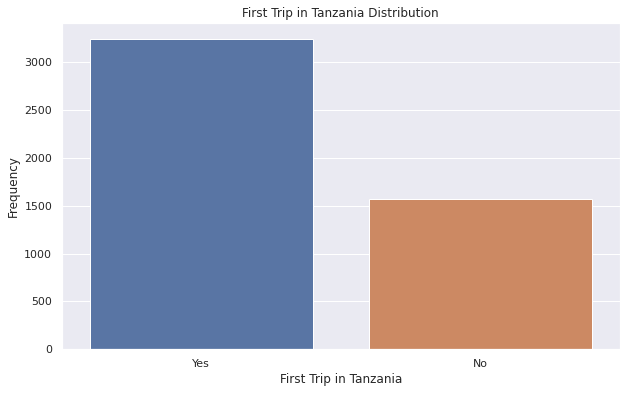

In [ ]:
ax = sns.barplot(x = df_train["first_trip_tz"].value_counts().sort_values(ascending = False).index, y = df_train["first_trip_tz"].value_counts().sort_values(ascending = False))
ax.set(xlabel='First Trip in Tanzania', ylabel='Frequency', title ='First Trip in Tanzania Distribution')

<div dir=rtl>

ניכר כי רוב התיירים, בדאטה סט זה, הגיעו בפעם הראשונה לטנזניה.

Text(0.5, 1.0, 'First Trip in Tanzania per Expenditure')

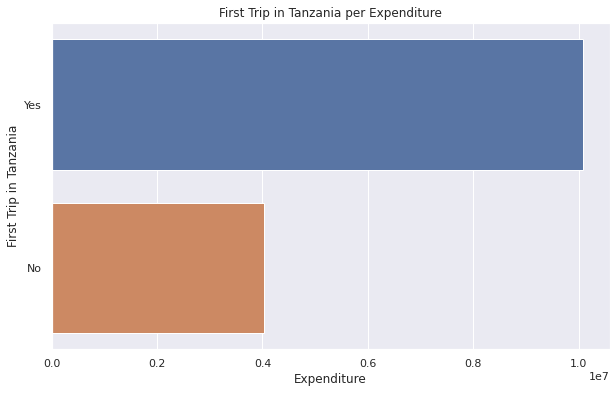

In [ ]:
fig = sns.barplot(x = df_train.groupby("first_trip_tz")["total_cost"].mean().sort_values(ascending = False).head(2),y = df_train.groupby("first_trip_tz")["total_cost"].mean().sort_values(ascending = False).head(2).index)
fig.set_xlabel("Expenditure")
fig.set_ylabel("First Trip in Tanzania")
fig.set_title("First Trip in Tanzania per Expenditure")

<div dir=rtl>

ניכר כי **תייר המגיע בפעם הראשונה לטנזניה, משלם יותר מכפול, מהתייר אשר לו יש ניסיון והיכרות עם המדינה**.<br>הדבר מצביע כמובן על חוסר ניסיון והיכרות עם המדינה, ובכך הוא מוציא משמעותית יותר (לא מכיר את השיטות המגוונות להוזולת מחירים עבור צרכיו).

In [ ]:
le = LabelEncoder()
df['first_trip_tz'] = le.fit_transform(df['first_trip_tz'])

In [ ]:
df.head(5)

,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,package_transport_int,...,"Newspaper, magazines,brochures",Trade fair,Independent,Package Tour,total_package,total_nights,payment_mode_Cash,payment_mode_Credit Card,payment_mode_Other,payment_mode_Travellers Cheque
0,SWIZERLAND,3,Friends/Relatives,1,1,Leisure and Holidays,Wildlife tourism,"Friends, relatives",Independent,0,...,0.0,0.0,1.0,0.0,0,13.0,1.0,0.0,0.0,0.0
1,UNITED KINGDOM,2,None,1,0,Leisure and Holidays,Cultural tourism,others,Independent,0,...,0.0,1.0,1.0,0.0,0,21.0,1.0,0.0,0.0,0.0
2,UNITED KINGDOM,2,Alone,0,1,Visiting Friends and Relatives,Cultural tourism,"Friends, relatives",Independent,0,...,0.0,0.0,1.0,0.0,0,32.0,1.0,0.0,0.0,0.0
3,UNITED KINGDOM,2,Spouse,1,1,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Package Tour,0,...,0.0,0.0,0.0,1.0,5,11.0,1.0,0.0,0.0,0.0
4,CHINA,1,None,1,0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Independent,0,...,0.0,0.0,1.0,0.0,0,11.0,1.0,0.0,0.0,0.0


<div dir=rtl>

המאפיין **most_impressing** הינו שדה טקסטואלי-קטגוריאלי לא היררכי אותו יש לקודד ע"פ שיטת **One-Hot encoding**.

In [ ]:
df['most_impressing'].unique()

array(['Friendly People', 'Wonderful Country, Landscape, Nature',
       'Excellent Experience', 'No comments', ' Wildlife', nan,
       'Good service', 'Satisfies and Hope Come Back'], dtype=object)

In [ ]:
df['most_impressing'].isna().sum()

424

<div dir=rtl>

לעמודה זו חסרים 424 ערכים אותם יש להשלים.<br> "**None**", ניתן למלא את השדות הריקים בערך זה.

In [ ]:
df['most_impressing'].fillna('None',inplace=True)

In [ ]:
df['most_impressing'].isna().sum()

0

<function matplotlib.pyplot.show(*args, **kw)>

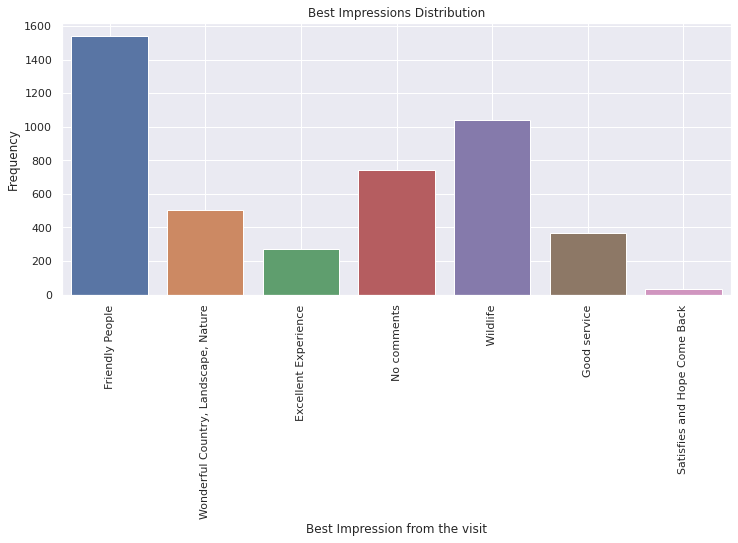

In [ ]:
plt.figure(figsize=(12,5))
ax=sns.countplot(x="most_impressing",data=df_train)
ax.set(xlabel='Best Impression from the visit', ylabel='Frequency', title ='Best Impressions Distribution')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.grid(True)
plt.show

<div dir=rtl>

ניכר כי **רוב התיירים התרשמו מהחברתיות של תושבי טנזניה, מחיות הפרא ומיופיה של המדינה והטבע שלה**.

Text(0.5, 1.0, 'Best impressions vs Expenditure')

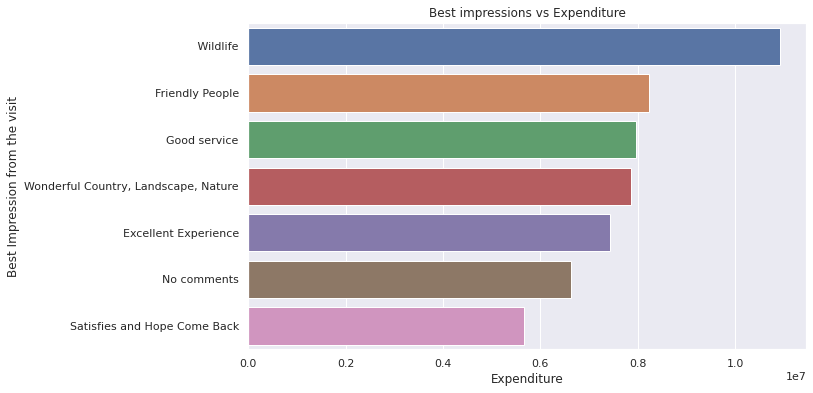

In [ ]:
fig = sns.barplot(x = df_train.groupby("most_impressing")["total_cost"].mean().sort_values(ascending = False).head(7),y = df_train.groupby("most_impressing")["total_cost"].mean().sort_values(ascending = False).head(7).index)
fig.set_xlabel("Expenditure")
fig.set_ylabel("Best Impression from the visit")
fig.set_title("Best impressions vs Expenditure")

<div dir=rtl>

ניכר כי התיירים שהכי התרשמו מחיות הפרא בטנזניה, שילמו הכי הרבה במהלך ביקורם.

In [ ]:
ohe = OneHotEncoder(handle_unknown='ignore')
most_impressing_list = df['most_impressing'].unique().tolist()
most_impressing_list = ['most_impressing_' + word for word in most_impressing_list]
df_temp = pd.DataFrame(ohe.fit_transform(df[['most_impressing']]).toarray())
df_temp.rename(columns=lambda i: most_impressing_list[i], inplace = True)
df = df.join(df_temp)

In [ ]:
df.head(5)

,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,package_transport_int,...,payment_mode_Other,payment_mode_Travellers Cheque,most_impressing_Friendly People,"most_impressing_Wonderful Country, Landscape, Nature",most_impressing_Excellent Experience,most_impressing_No comments,most_impressing_ Wildlife,most_impressing_None,most_impressing_Good service,most_impressing_Satisfies and Hope Come Back
0,SWIZERLAND,3,Friends/Relatives,1,1,Leisure and Holidays,Wildlife tourism,"Friends, relatives",Independent,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,UNITED KINGDOM,2,None,1,0,Leisure and Holidays,Cultural tourism,others,Independent,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,UNITED KINGDOM,2,Alone,0,1,Visiting Friends and Relatives,Cultural tourism,"Friends, relatives",Independent,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,UNITED KINGDOM,2,Spouse,1,1,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Package Tour,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,CHINA,1,None,1,0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Independent,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


### Correlation Matrix

<div dir=rtl>

**הערה לבודק**: בשל העובדה שכמות הפיצ'רים, לאחר הקידודים שנעשו, הינה גבוהה, יווצר מצב שמטריצת הקורלציה מאוד גדולה ולא רואים את הערכים בכל משבצת. לכן אבצע **Label encoding** לעמודות אותן קידדתי ע"פ One-Hot encoding, למרות שהקידוד הנכון להם הוא One-Hot כמו שעשיתי בדאטה פריים המקורי.
כעת, אבחן את הקורלציות בין הפיצ'רים השונים:

In [ ]:
df_train.head(1)

,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,package_transport_int,...,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz,most_impressing,total_cost
0,SWIZERLAND,45-64,Friends/Relatives,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Friends, relatives",Independent,No,...,No,No,No,No,13,0.0,Cash,No,Friendly People,674602.5


In [ ]:
corr_matrix_df = df[['country','main_activity','travel_with','purpose','info_source','tour_arrangement','payment_mode','most_impressing','total_female','total_male','total_persons','night_mainland','night_zanzibar','total_nights','package_transport_int','package_accomodation','package_food','package_transport_tz','package_sightseeing','package_guided_tour','package_insurance','total_package','total_cost']].copy()

In [ ]:
le = LabelEncoder()
corr_matrix_df['country'] = le.fit_transform(corr_matrix_df['country'])
corr_matrix_df['travel_with'] = le.fit_transform(corr_matrix_df['travel_with'])
corr_matrix_df['purpose'] = le.fit_transform(corr_matrix_df['purpose'])
corr_matrix_df['main_activity'] = le.fit_transform(corr_matrix_df['main_activity'])
corr_matrix_df['info_source'] = le.fit_transform(corr_matrix_df['info_source'])
corr_matrix_df['tour_arrangement'] = le.fit_transform(corr_matrix_df['tour_arrangement'])
corr_matrix_df['payment_mode'] = le.fit_transform(corr_matrix_df['payment_mode'])
corr_matrix_df['most_impressing'] = le.fit_transform(corr_matrix_df['most_impressing'])

In [ ]:
corr_matrix_df.head(5)

,country,main_activity,travel_with,purpose,info_source,tour_arrangement,payment_mode,most_impressing,total_female,total_male,...,total_nights,package_transport_int,package_accomodation,package_food,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,total_package,total_cost
0,101,7,2,1,0,0,0,2,1,1,...,13.0,0,0,0,0,0,0,0,0,674602.5
1,111,3,3,1,7,0,0,7,1,0,...,21.0,0,0,0,0,0,0,0,0,3214906.5
2,111,3,0,5,0,0,0,1,0,1,...,32.0,0,0,0,0,0,0,0,0,3315000.0
3,111,7,4,1,5,1,0,2,1,1,...,11.0,0,1,1,1,1,1,0,5,7790250.0
4,17,7,3,1,5,0,0,4,1,0,...,11.0,0,0,0,0,0,0,0,0,1657500.0


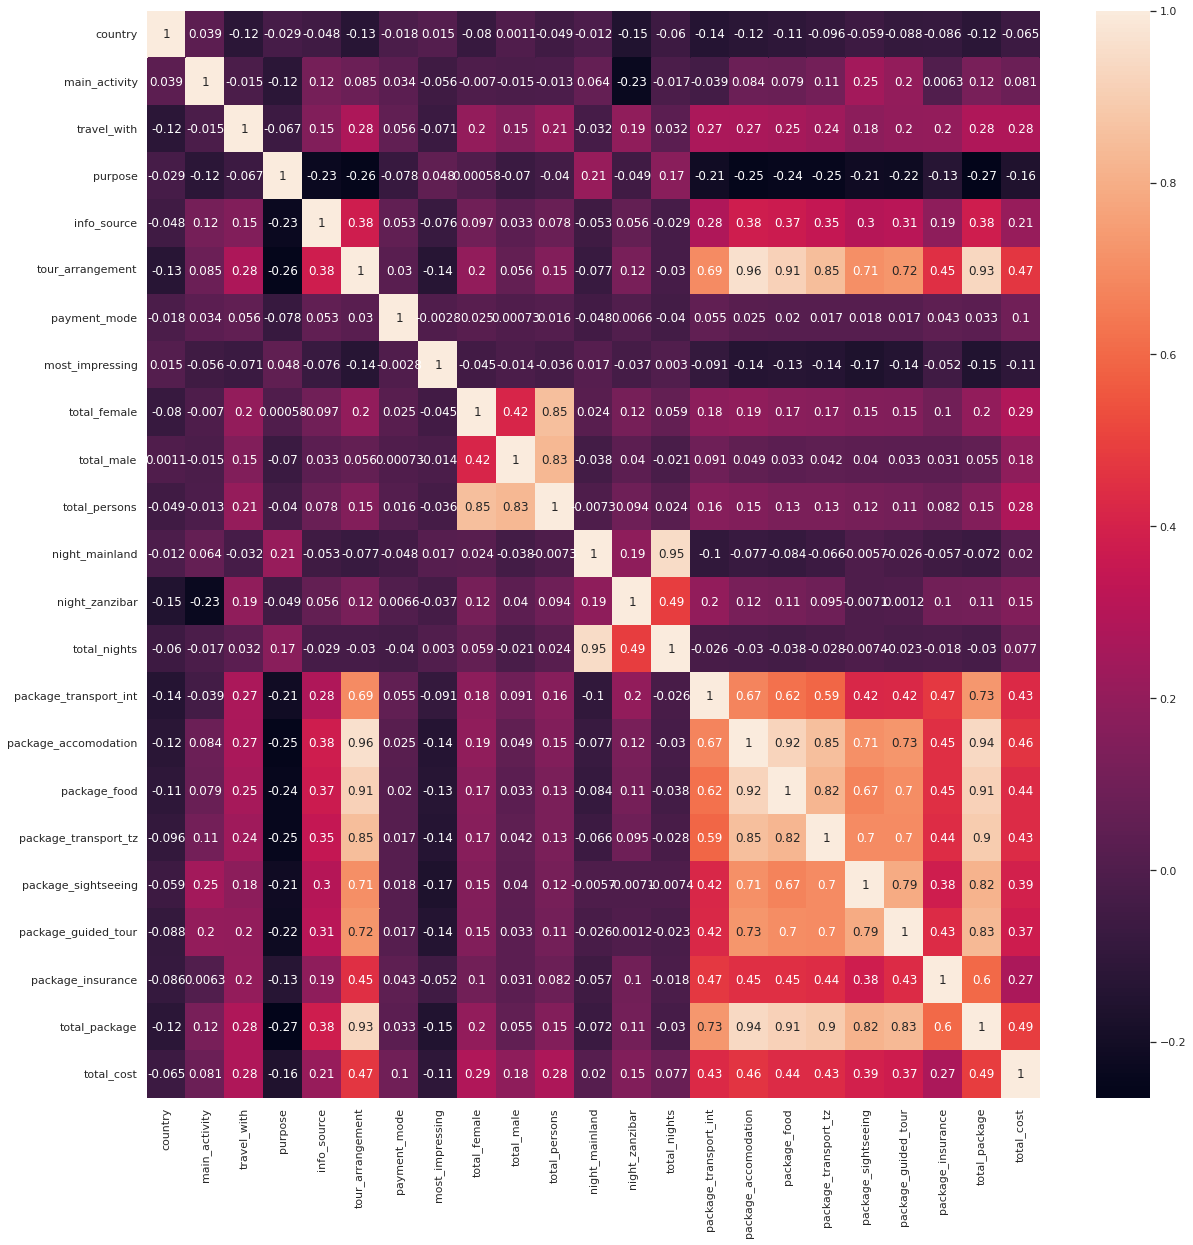

In [ ]:
corrMatrix = corr_matrix_df.corr()
fig, ax = plt.subplots(figsize=(20,20)) 
sns.heatmap(corrMatrix, annot=True, ax=ax)
plt.show()

<div dir=rtl>

מה- heatmap אשר מוצגת לפנינו, ניתן ללמוד על הקורלציה (ההתאמה) בין הפיצ'רים  הנומריים השונים בהם טיפלתי עד כה וסך הוצאותיו של תייר.<br>המאפיינים הנחזים להיות הקשורים ביותר לחיזוי גובה ההוצאות של תייר (שה**קורלצייה** ביניהם לבין הlabel- total_cost, הינה גבוהה בהרבה ביחס לפיצ'רים אחרים):
<br>
<div dir=ltr>

Total Package, Guided tour Package, sightseeing Package, food Package, accomodation package, international transport Package, and tour arrangment.
<br>
<div dir=rtl>

ניכר כי הפיצ'רים הבאים אינם קורלטיבים אל עמודת סך ההוצאות של התייר:
<br> Country, purpose, main_activity, nights in the mainland, nights in Zanzibar and most impressing<br> עלולים להיות פחות רלוונטיים בשל הקורלצייה הנמוכה שלהן עם עמודת הדירוג (**הנ"ל לא אומר שהן לא רלוונטיות כלל**).



### Preparing and Splitting the data for the models
<div dir=rtl>

<div dir=rtl>

בפרויקט זה אבחר להשתמש במודלים השונים של Boosting.<br> אלה מסתמכים על gradient boosting של עצי החלטה ולמידה מהטעויות של העצים הקודמים שנבנו ובכך יורידו את השגיאות עד לכדי מצב שה- loss function יגיע למינימום.<br>המודלים: **XGBoost, Cat Boost ,LightGBM ו- Random Forest**.<br>כמובן שאלה מודלים של **רגרסיה** כי מדובר בערך נחזה **רציף**.<br>אני בוחר במודלים אלה בתור התחלה, מפני שהם בדר"כ הכי אידיאליים לדאטה טבולארי ולדאטה קטגוריאלי.

In [ ]:
df_train = df[:index_train] ## פיצול של הדאטה פריים הכללי, בחזרה לדאטה פריימים המקוריים
df_test  = df[index_train:]

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4809 entries, 0 to 4808
Columns: 187 entries, country to most_impressing_Satisfies and Hope Come Back
dtypes: float64(165), int64(14), object(8)
memory usage: 6.9+ MB


In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1601 entries, 4809 to 6409
Columns: 187 entries, country to most_impressing_Satisfies and Hope Come Back
dtypes: float64(165), int64(14), object(8)
memory usage: 2.3+ MB


In [ ]:
df_train.drop(['country','travel_with','purpose','main_activity','info_source','tour_arrangement','payment_mode','most_impressing'],axis=1,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
df_test.drop(['country','travel_with','purpose','main_activity','info_source','tour_arrangement','payment_mode','most_impressing','total_cost'],axis=1,inplace=True)

In [ ]:
df_train.head()

,age_group,total_female,total_male,package_transport_int,package_accomodation,package_food,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,...,payment_mode_Other,payment_mode_Travellers Cheque,most_impressing_Friendly People,"most_impressing_Wonderful Country, Landscape, Nature",most_impressing_Excellent Experience,most_impressing_No comments,most_impressing_ Wildlife,most_impressing_None,most_impressing_Good service,most_impressing_Satisfies and Hope Come Back
0,3,1,1,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,2,1,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,2,0,1,0,0,0,0,0,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2,1,1,0,1,1,1,1,1,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,1,1,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [ ]:
df_test.head()

,age_group,total_female,total_male,package_transport_int,package_accomodation,package_food,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,...,payment_mode_Other,payment_mode_Travellers Cheque,most_impressing_Friendly People,"most_impressing_Wonderful Country, Landscape, Nature",most_impressing_Excellent Experience,most_impressing_No comments,most_impressing_ Wildlife,most_impressing_None,most_impressing_Good service,most_impressing_Satisfies and Hope Come Back
4809,3,1,1,1,1,1,1,1,1,1,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4810,2,0,4,1,1,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4811,2,3,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4812,1,2,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4813,3,2,2,1,1,1,1,0,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import StackingRegressor

In [ ]:
# Data normalization with sklearn # סקיילינג של ה target
scaler = MinMaxScaler()
df_train['norm_target'] = scaler.fit_transform(df_train[['total_cost']])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
x = df_train.drop(labels=['total_cost','norm_target'], axis = 1)
y = df_train['norm_target']

In [ ]:
y.head(5)

0    0.006288
1    0.031823
2    0.032829
3    0.077814
4    0.016168
Name: norm_target, dtype: float64

In [ ]:
x.head(5)

,age_group,total_female,total_male,package_transport_int,package_accomodation,package_food,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,...,payment_mode_Other,payment_mode_Travellers Cheque,most_impressing_Friendly People,"most_impressing_Wonderful Country, Landscape, Nature",most_impressing_Excellent Experience,most_impressing_No comments,most_impressing_ Wildlife,most_impressing_None,most_impressing_Good service,most_impressing_Satisfies and Hope Come Back
0,3,1,1,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,2,1,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,2,0,1,0,0,0,0,0,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2,1,1,0,1,1,1,1,1,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,1,1,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


<div dir=rtl>

**כעת אפצל את הדאטה סט לשלושה חלקים** (train, validation & test) ל 70-15-15:

In [ ]:
# split to train, val and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3,random_state = 1)
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size = 0.5,random_state = 1)

In [ ]:
print(f'x_train: {x_train.shape}')
print(f'x_val: {x_val.shape}')
print(f'x_test: {x_test.shape}')
print(f'y_train: {y_train.shape}')
print(f'y_val: {y_val.shape}')
print(f'y_test: {y_test.shape}')

x_train: (3366, 178)
x_val: (721, 178)
x_test: (722, 178)
y_train: (3366,)
y_val: (721,)
y_test: (722,)


In [ ]:
y_val.head(5)

3667    0.000341
4286    0.000814
898     0.082896
3802    0.003839
418     0.041160
Name: norm_target, dtype: float64

In [ ]:
x.head()

,age_group,total_female,total_male,package_transport_int,package_accomodation,package_food,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,...,payment_mode_Other,payment_mode_Travellers Cheque,most_impressing_Friendly People,"most_impressing_Wonderful Country, Landscape, Nature",most_impressing_Excellent Experience,most_impressing_No comments,most_impressing_ Wildlife,most_impressing_None,most_impressing_Good service,most_impressing_Satisfies and Hope Come Back
0,3,1,1,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,2,1,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,2,0,1,0,0,0,0,0,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2,1,1,0,1,1,1,1,1,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,1,1,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [ ]:
df_test.head()

,age_group,total_female,total_male,package_transport_int,package_accomodation,package_food,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,...,payment_mode_Other,payment_mode_Travellers Cheque,most_impressing_Friendly People,"most_impressing_Wonderful Country, Landscape, Nature",most_impressing_Excellent Experience,most_impressing_No comments,most_impressing_ Wildlife,most_impressing_None,most_impressing_Good service,most_impressing_Satisfies and Hope Come Back
4809,3,1,1,1,1,1,1,1,1,1,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4810,2,0,4,1,1,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4811,2,3,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4812,1,2,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4813,3,2,2,1,1,1,1,0,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
[col for col in df_test.columns if col not in x.columns]

[]

<div dir=rtl>

**הערה חשובה**: נדרשנו לכמת את טיב כל מודל לפי מטריקה של **השגיאה המוחלטת הממוצעת**.<br>כמו כן, מדובר על בעיית רגרסיה (ערך ההוצאות הינו **רציף**) כך שלדיוק (accuracy) יהיה משמעות אחרת ולא מתאימה לסוג בעיה זה.

### CatBoost Regressor
<div dir=rtl>


In [ ]:
# split to train, val and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3,random_state = 1)
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size = 0.5,random_state = 1)

In [ ]:
print(f'x_train: {x_train.shape}')
print(f'x_val: {x_val.shape}')
print(f'x_test: {x_test.shape}')
print(f'y_train: {y_train.shape}')
print(f'y_val: {y_val.shape}')
print(f'y_test: {y_test.shape}')

x_train: (3366, 178)
x_val: (721, 178)
x_test: (722, 178)
y_train: (3366,)
y_val: (721,)
y_test: (722,)


In [ ]:
CBR = CatBoostRegressor() # Native handling for categorical features(!),Fast GPU training,
                          # feature analysis Using Oblivious Trees (when all leaves are at the same height!) or Symmetric Trees for faster execution
                          # and Ordered Boosting to overcome overfitting

<div dir=rtl>

כעת אשתמש ב- GridSearchCV על מנת למצוא את ה- Hyper Parameters האידיאלים לקבלת ביצועי מודל מיטביים.

In [ ]:
parameters={'depth': [6,8,10,14],
            'learning_rate': [0.01, 0.05, 0.1, 0.15],
            'iterations': [30, 70, 110]}

In [ ]:
CBR_tuning_model = GridSearchCV(estimator=CBR, param_grid = parameters, cv = 2, n_jobs=-1) #cv=cross validation(K-FOLD), n_jobs=-1 (number of jobs to be running in parallel - using all proccessors)

In [ ]:
CBR_tuning_model.fit(x_train, y_train)

0:	learn: 0.1196532	total: 49.1ms	remaining: 3.39s
1:	learn: 0.1146100	total: 51.5ms	remaining: 1.75s
2:	learn: 0.1110530	total: 53.7ms	remaining: 1.2s
3:	learn: 0.1082853	total: 56ms	remaining: 924ms
4:	learn: 0.1059549	total: 58.3ms	remaining: 758ms
5:	learn: 0.1041933	total: 60.6ms	remaining: 646ms
6:	learn: 0.1026174	total: 63.2ms	remaining: 569ms
7:	learn: 0.1013875	total: 65.8ms	remaining: 510ms
8:	learn: 0.0998609	total: 68.4ms	remaining: 464ms
9:	learn: 0.0984680	total: 71.2ms	remaining: 427ms
10:	learn: 0.0974943	total: 73.9ms	remaining: 396ms
11:	learn: 0.0965530	total: 76.5ms	remaining: 370ms
12:	learn: 0.0960055	total: 79.1ms	remaining: 347ms
13:	learn: 0.0952330	total: 81.5ms	remaining: 326ms
14:	learn: 0.0948053	total: 83.9ms	remaining: 308ms
15:	learn: 0.0939787	total: 86.4ms	remaining: 292ms
16:	learn: 0.0935234	total: 88.9ms	remaining: 277ms
17:	learn: 0.0929817	total: 91.5ms	remaining: 264ms
18:	learn: 0.0924039	total: 94ms	remaining: 252ms
19:	learn: 0.0916694	total:

GridSearchCV(cv=2,
             estimator=<catboost.core.CatBoostRegressor object at 0x7ff0b8a862d0>,
             n_jobs=-1,
             param_grid={'depth': [6, 8, 10, 14], 'iterations': [30, 70, 110],
                         'learning_rate': [0.01, 0.05, 0.1, 0.15]})

In [ ]:
# best hyperparameters for the CBR Regressor
CBR_tuning_model.best_params_

{'depth': 6, 'iterations': 70, 'learning_rate': 0.15}

In [ ]:
CBR_tuning_model = CatBoostRegressor(depth= 6, iterations= 70, learning_rate= 0.15)

In [ ]:
CBR_tuning_model.fit(x_train,y_train)

0:	learn: 0.1196532	total: 2.52ms	remaining: 174ms
1:	learn: 0.1146100	total: 5.08ms	remaining: 173ms
2:	learn: 0.1110530	total: 7.72ms	remaining: 172ms
3:	learn: 0.1082853	total: 10.2ms	remaining: 167ms
4:	learn: 0.1059549	total: 12.8ms	remaining: 167ms
5:	learn: 0.1041933	total: 15.4ms	remaining: 164ms
6:	learn: 0.1026174	total: 18ms	remaining: 162ms
7:	learn: 0.1013875	total: 20.5ms	remaining: 159ms
8:	learn: 0.0998609	total: 22.9ms	remaining: 155ms
9:	learn: 0.0984680	total: 25.4ms	remaining: 153ms
10:	learn: 0.0974943	total: 28.1ms	remaining: 150ms
11:	learn: 0.0965530	total: 30.6ms	remaining: 148ms
12:	learn: 0.0960055	total: 33.1ms	remaining: 145ms
13:	learn: 0.0952330	total: 35.7ms	remaining: 143ms
14:	learn: 0.0948053	total: 38.1ms	remaining: 140ms
15:	learn: 0.0939787	total: 40.6ms	remaining: 137ms
16:	learn: 0.0935234	total: 43.1ms	remaining: 135ms
17:	learn: 0.0929817	total: 45.9ms	remaining: 133ms
18:	learn: 0.0924039	total: 48.4ms	remaining: 130ms
19:	learn: 0.0916694	tot

In [ ]:
train_predictions=CBR_tuning_model.predict(x_train)
# Predicting the Validation set results
print('Mean Absolute Error = '+str(mean_absolute_error(y_train,train_predictions)))

Mean Absolute Error = 0.04410003126355951


In [ ]:
val_predictions=CBR_tuning_model.predict(x_val)
# Predicting the Validation set results
print('Mean Absolute Error = '+str(mean_absolute_error(y_val,val_predictions)))
#val_predictions = scaler.inverse_transform(val_predictions.reshape(-1,1))

Mean Absolute Error = 0.04649001325951866


In [ ]:
predictions=CBR_tuning_model.predict(x_test)
# Predicting the Test set results
print('Mean Absolute Error = '+str(mean_absolute_error(y_test,predictions)))
#predictions = scaler.inverse_transform(pred.reshape(-1,1))

Mean Absolute Error = 0.050288980793798045


In [ ]:
df_test.head()

,age_group,total_female,total_male,package_transport_int,package_accomodation,package_food,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,...,payment_mode_Other,payment_mode_Travellers Cheque,most_impressing_Friendly People,"most_impressing_Wonderful Country, Landscape, Nature",most_impressing_Excellent Experience,most_impressing_No comments,most_impressing_ Wildlife,most_impressing_None,most_impressing_Good service,most_impressing_Satisfies and Hope Come Back
4809,3,1,1,1,1,1,1,1,1,1,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4810,2,0,4,1,1,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4811,2,3,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4812,1,2,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4813,3,2,2,1,1,1,1,0,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
x.head()

,age_group,total_female,total_male,package_transport_int,package_accomodation,package_food,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,...,payment_mode_Other,payment_mode_Travellers Cheque,most_impressing_Friendly People,"most_impressing_Wonderful Country, Landscape, Nature",most_impressing_Excellent Experience,most_impressing_No comments,most_impressing_ Wildlife,most_impressing_None,most_impressing_Good service,most_impressing_Satisfies and Hope Come Back
0,3,1,1,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,2,1,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,2,0,1,0,0,0,0,0,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2,1,1,0,1,1,1,1,1,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,1,1,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [ ]:
submission_pred_CBR = CBR_tuning_model.predict(df_test)

In [ ]:
predictions = scaler.inverse_transform(submission_pred_CBR.reshape(-1,1))

In [ ]:
df_submission = pd.DataFrame({'ID':ID_test,'total_cost':predictions.ravel()})#.flatten()})

In [ ]:
df_submission.head()

,ID,total_cost
0,tour_1,2.068990e+07
1,tour_100,1.455150e+07
2,tour_1001,1.174879e+07
3,tour_1006,3.724042e+06
4,tour_1009,2.087322e+07


In [ ]:
df_submission.to_csv('final_29.csv',index=False)

In [ ]:
inversed_y_train = scaler.inverse_transform(y_train.values.reshape(-1,1))

In [ ]:
inversed_train_predictions = scaler.inverse_transform(train_predictions.reshape(-1,1))

In [ ]:
print('Mean Absolute Error = '+str(mean_absolute_error(inversed_y_train,inversed_train_predictions)))

Mean Absolute Error = 4350418.890962529


In [ ]:
inversed_y_val = scaler.inverse_transform(y_val.values.reshape(-1,1))

In [ ]:
inversed_val_predictions = scaler.inverse_transform(val_predictions.reshape(-1,1))

In [ ]:
# np.info(predictions.flatten()) # to get a 1- dimensional array for the submission

In [ ]:
print('Mean Absolute Error = '+str(mean_absolute_error(inversed_y_val,inversed_val_predictions)))

Mean Absolute Error = 4537107.126967972


### LGBMBoost Regressor
<div dir=rtl>


In [ ]:
# split to train, val and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3,random_state = 1)
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size = 0.5,random_state = 1)

In [ ]:
print(f'x_train: {x_train.shape}')
print(f'x_val: {x_val.shape}')
print(f'x_test: {x_test.shape}')
print(f'y_train: {y_train.shape}')
print(f'y_val: {y_val.shape}')
print(f'y_test: {y_test.shape}')

x_train: (3366, 178)
x_val: (721, 178)
x_test: (722, 178)
y_train: (3366,)
y_val: (721,)
y_test: (722,)


In [ ]:
LGBM = LGBMRegressor() # light gradient bossting machine. enables parallel training, multiple loss functions,
                       # bagging (generating new samples and picking the best ones by weights), stops early (avoiding overfitting as much as possible)

<div dir=rtl>

כעת אשתמש ב- GridSearchCV על מנת למצוא את ה- Hyper Parameters האידיאלים לקבלת ביצועי מודל מיטביים.

In [ ]:
parameters={'num_leaves': [7, 21, 31, 50],
    'learning_rate': [0.1, 0.03, 0.003],
    'max_depth': [1, 3, 5],
    'n_estimators': [50, 150, 500]}

In [ ]:
LGBM_tuning_model = GridSearchCV(estimator=LGBM, param_grid = parameters,scoring='r2', cv=5) #cv=cross validation, r2=“(total variance explained by model) / total variance.” --> if 100% then correlated perfectly  with no variance.

In [ ]:
LGBM_tuning_model.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=LGBMRegressor(),
             param_grid={'learning_rate': [0.1, 0.03, 0.003],
                         'max_depth': [1, 3, 5], 'n_estimators': [50, 150, 500],
                         'num_leaves': [7, 21, 31, 50]},
             scoring='r2')

In [ ]:
# best hyperparameters for the CBR Regressor
LGBM_tuning_model.best_params_

{'learning_rate': 0.03, 'max_depth': 5, 'n_estimators': 150, 'num_leaves': 7}

In [ ]:
LGBM_tuning_model = LGBMRegressor(num_leaves= 7, learning_rate= 0.03, max_depth= 5,n_estimators= 150)

In [ ]:
LGBM_tuning_model.fit(x_train,y_train)

LGBMRegressor(learning_rate=0.03, max_depth=5, n_estimators=150, num_leaves=7)

In [ ]:
val_predictions=LGBM_tuning_model.predict(x_val)
# Predicting the Validation set results
print('Mean Absolute Error = '+str(mean_absolute_error(y_val,val_predictions))+' (TZS)')

Mean Absolute Error = 0.04680871001288007 (TZS)


In [ ]:
predictions=LGBM_tuning_model.predict(x_test)
# Predicting the Test set results
print('Mean Absolute Error = '+str(mean_absolute_error(y_test,predictions))+' (TZS)')

Mean Absolute Error = 0.05062772225480415 (TZS)


In [ ]:
submission_pred_LGBM = LGBM_tuning_model.predict(df_test)

In [ ]:
predictions = scaler.inverse_transform(submission_pred_LGBM.reshape(-1,1))

In [ ]:
#np.info(predictions.flatten())  to get a 1- dimensional array for the submission

In [ ]:
df_submission = pd.DataFrame({'ID':ID_test,'total_cost':predictions.flatten()})

In [ ]:
df_submission.head()

,ID,total_cost
0,tour_1,1.958862e+07
1,tour_100,1.053372e+07
2,tour_1001,9.313418e+06
3,tour_1006,3.451067e+06
4,tour_1009,2.082741e+07


In [ ]:
df_submission.to_csv('final_34.csv',index=False)

In [ ]:
inversed_y_train = scaler.inverse_transform(y_train.values.reshape(-1,1))

In [ ]:
inversed_train_predictions = scaler.inverse_transform(train_predictions.reshape(-1,1))

In [ ]:
print('Mean Absolute Error = '+str(mean_absolute_error(inversed_y_train,inversed_train_predictions)))

Mean Absolute Error = 4350418.890962529


In [ ]:
inversed_y_val = scaler.inverse_transform(y_val.values.reshape(-1,1))

In [ ]:
inversed_val_predictions = scaler.inverse_transform(val_predictions.reshape(-1,1))

In [ ]:
# np.info(predictions.flatten()) # to get a 1- dimensional array for the submission

In [ ]:
print('Mean Absolute Error = '+str(mean_absolute_error(inversed_y_val,inversed_val_predictions)))

Mean Absolute Error = 4751910.510362048


### XGBoost Regressor
<div dir=rtl>


In [ ]:
# split to train, val and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3,random_state = 1)
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size = 0.5,random_state = 1)

In [ ]:
print(f'x_train: {x_train.shape}')
print(f'x_val: {x_val.shape}')
print(f'x_test: {x_test.shape}')
print(f'y_train: {y_train.shape}')
print(f'y_val: {y_val.shape}')
print(f'y_test: {y_test.shape}')

x_train: (3366, 178)
x_val: (721, 178)
x_test: (722, 178)
y_train: (3366,)
y_val: (721,)
y_test: (722,)


In [ ]:
XGB = XGBRegressor()

<div dir=rtl>

כעת אשתמש ב- GridSearchCV על מנת למצוא את ה- Hyper Parameters האידיאלים לקבלת ביצועי מודל מיטביים.

In [ ]:
parameters={'n_estimators': [50, 100, 200],
            'max_depth': [2, 7, 15],
            'learning_rate': [0.05, 0.1, 0.15],
            'min_child_weight': [1, 4, 7]}

In [ ]:
XGB_tuning_model = GridSearchCV(XGB,param_grid=parameters,scoring='neg_mean_squared_error',cv=3,verbose=3) # cross validation --> 3 (k-folds)

In [ ]:
XGB_tuning_model.fit(x_train,y_train)

Fitting 3 folds for each of 81 candidates, totalling 243 fits
[13:22:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV 1/3] END learning_rate=0.05, max_depth=2, min_child_weight=1, n_estimators=50;, score=-0.010 total time=   0.4s
[13:22:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV 2/3] END learning_rate=0.05, max_depth=2, min_child_weight=1, n_estimators=50;, score=-0.013 total time=   0.4s
[13:22:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV 3/3] END learning_rate=0.05, max_depth=2, min_child_weight=1, n_estimators=50;, score=-0.011 total time=   0.4s
[13:22:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV 1/3] END learning_rate=0.05, max_depth=2, min_child_weight=1, n_estimators=100

GridSearchCV(cv=3, estimator=XGBRegressor(),
             param_grid={'learning_rate': [0.05, 0.1, 0.15],
                         'max_depth': [2, 7, 15], 'min_child_weight': [1, 4, 7],
                         'n_estimators': [50, 100, 200]},
             scoring='neg_mean_squared_error', verbose=3)

In [ ]:
# best hyperparameters for the XGB Regressor
XGB_tuning_model.best_params_

{'learning_rate': 0.1,
 'max_depth': 7,
 'min_child_weight': 4,
 'n_estimators': 50}

In [ ]:
XGB_tuning_model = XGBRegressor(n_estimators=50,max_depth=7,learning_rate=0.1,min_child_weight=4)

In [ ]:
XGB_tuning_model.fit(x_train,y_train)

[05:41:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(max_depth=7, min_child_weight=4, n_estimators=50)

In [ ]:
train_predictions=XGB_tuning_model.predict(x_train)
# Predicting the Validation set results
print('Mean Absolute Error = '+str(mean_absolute_error(y_train,train_predictions)))

Mean Absolute Error = 0.03593858884931235


In [ ]:
val_pred=XGB_tuning_model.predict(x_val)
# Predicting the Validation set results
print('Mean Absolute Error = '+str(mean_absolute_error(y_val,val_pred))+' (TZS)')

Mean Absolute Error = 0.04742530881236703 (TZS)


In [ ]:
predictions=XGB_tuning_model.predict(x_test)
# Predicting the Test set results
print('Mean Absolute Error = '+str(mean_absolute_error(y_test,predictions))+' (TZS)')

Mean Absolute Error = 0.0516971642924266 (TZS)


In [ ]:
df_test.head()

,age_group,total_female,total_male,package_transport_int,package_accomodation,package_food,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,...,payment_mode_Other,payment_mode_Travellers Cheque,most_impressing_Friendly People,"most_impressing_Wonderful Country, Landscape, Nature",most_impressing_Excellent Experience,most_impressing_No comments,most_impressing_ Wildlife,most_impressing_None,most_impressing_Good service,most_impressing_Satisfies and Hope Come Back
4809,3,1,1,1,1,1,1,1,1,1,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4810,2,0,4,1,1,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4811,2,3,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4812,1,2,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4813,3,2,2,1,1,1,1,0,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
submission_pred_XGB = XGB_tuning_model.predict(df_test)

In [ ]:
predictions = scaler.inverse_transform(submission_pred_XGB.reshape(-1,1))

In [ ]:
#np.info(predictions.flatten())  to get a 1- dimensional array for the submission

In [ ]:
df_submission = pd.DataFrame({'ID':ID_test,'total_cost':predictions.flatten()})

In [ ]:
df_submission.head()

,ID,total_cost
0,tour_1,21775122.00
1,tour_100,6726697.50
2,tour_1001,14917269.00
3,tour_1006,3177510.25
4,tour_1009,22343682.00


In [ ]:
df_submission.to_csv('final_35.csv',index=False)

In [ ]:
inversed_y_train = scaler.inverse_transform(y_train.values.reshape(-1,1))

In [ ]:
inversed_train_predictions = scaler.inverse_transform(train_predictions.reshape(-1,1))

In [ ]:
print('Mean Absolute Error = '+str(mean_absolute_error(inversed_y_train,inversed_train_predictions)))

Mean Absolute Error = 3575310.1144107627


In [ ]:
inversed_y_val = scaler.inverse_transform(y_val.values.reshape(-1,1))

In [ ]:
inversed_val_predictions = scaler.inverse_transform(val_predictions.reshape(-1,1))

In [ ]:
# np.info(predictions.flatten()) # to get a 1- dimensional array for the submission

In [ ]:
print('Mean Absolute Error = '+str(mean_absolute_error(inversed_y_val,inversed_val_predictions)))

Mean Absolute Error = 4535544.163935715


### Random Forest Regressor
<div dir=rtl>


In [ ]:
# split to train, val and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3,random_state = 1)
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size = 0.5,random_state = 1)

In [ ]:
print(f'x_train: {x_train.shape}')
print(f'x_val: {x_val.shape}')
print(f'x_test: {x_test.shape}')
print(f'y_train: {y_train.shape}')
print(f'y_val: {y_val.shape}')
print(f'y_test: {y_test.shape}')

x_train: (3366, 178)
x_val: (721, 178)
x_test: (722, 178)
y_train: (3366,)
y_val: (721,)
y_test: (722,)


In [ ]:
rand_forest_reg = RandomForestRegressor()

<div dir=rtl>

כעת אשתמש ב- GridSearchCV על מנת למצוא את ה- Hyper Parameters האידיאלים לקבלת ביצועי מודל מיטביים.

In [ ]:
parameters={"bootstrap":[True, False], # Bootstrapping is the method of randomly creating samples of data out of a population with replacement to estimate a population parameter.
            "n_estimators" : [200, 800, 1400],
            "max_depth" : [10,100, None], # the maximum hieght of the tree
           "min_samples_leaf":[1, 2, 4], # The minimum number of samples required to be at a leaf node
            "min_samples_split": [2, 5, 10], # The minimum number of samples required to split an internal node
           "max_features":["auto","sqrt"] } # The number of features to consider when looking for the best split

In [ ]:
forest_tuning_model = GridSearchCV(rand_forest_reg,param_grid=parameters,scoring='neg_mean_squared_error',cv=3,verbose=3)

In [ ]:
forest_tuning_model.fit(x_train,y_train)

Fitting 3 folds for each of 324 candidates, totalling 972 fits
[CV 1/3] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=-0.010 total time=   2.4s
[CV 2/3] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=-0.011 total time=   2.4s
[CV 3/3] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=-0.010 total time=   2.4s
[CV 1/3] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=800;, score=-0.009 total time=   9.3s
[CV 2/3] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=800;, score=-0.011 total time=   9.3s
[CV 3/3] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=800;, score=-0.010 total time=   9.3s
[CV 1/3] END 

GridSearchCV(cv=3, estimator=RandomForestRegressor(),
             param_grid={'bootstrap': [True, False],
                         'max_depth': [10, 100, None],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [200, 800, 1400]},
             scoring='neg_mean_squared_error', verbose=3)

In [ ]:
# best hyperparameters for the Random Forest Regressor
forest_tuning_model.best_params_

{'bootstrap': True,
 'max_depth': 100,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 800}

In [ ]:
tuned_hyper_model = RandomForestRegressor(bootstrap=True,max_depth=100,max_features='sqrt',min_samples_leaf=1,min_samples_split=5,n_estimators=800)

In [ ]:
tuned_hyper_model.fit(x_train,y_train)

RandomForestRegressor(max_depth=100, max_features='sqrt', min_samples_split=5,
                      n_estimators=800)

In [ ]:
val_pred=tuned_hyper_model.predict(x_val)
# Predicting the Validation set results
print('Mean Absolute Error = '+str(mean_absolute_error(y_val,val_pred)))

Mean Absolute Error = 0.045590746881700325


In [ ]:
pred=tuned_hyper_model.predict(x_test)
# Predicting the Test set results
print('Mean Absolute Error = '+str(mean_absolute_error(y_test,pred)))

Mean Absolute Error = 0.049676021462637304


In [ ]:
submission_pred_RFR= tuned_hyper_model.predict(df_test)

In [ ]:
predictions = scaler.inverse_transform(submission_pred_RFR.reshape(-1,1))

In [ ]:
#np.info(predictions.flatten())  to get a 1- dimensional array for the submission

In [ ]:
df_submission = pd.DataFrame({'ID':ID_test,'total_cost':predictions.flatten()})

In [ ]:
df_submission.head()

,ID,total_cost
0,tour_1,2.041108e+07
1,tour_100,1.130818e+07
2,tour_1001,1.195774e+07
3,tour_1006,3.129716e+06
4,tour_1009,1.898478e+07


In [ ]:
df_submission.to_csv('final_32.csv',index=False)

In [ ]:
inversed_y_train = scaler.inverse_transform(y_train.values.reshape(-1,1))

In [ ]:
inversed_train_predictions = scaler.inverse_transform(train_predictions.reshape(-1,1))

In [ ]:
print('Mean Absolute Error = '+str(mean_absolute_error(inversed_y_train,inversed_train_predictions)))

Mean Absolute Error = 4350418.890962529


In [ ]:
val_predictions=tuned_hyper_model.predict(x_val)
# Predicting the Validation set results
print('Mean Absolute Error = '+str(mean_absolute_error(y_val,val_predictions)))

Mean Absolute Error = 0.045590746881700325


In [ ]:
inversed_y_val = scaler.inverse_transform(y_val.values.reshape(-1,1))

In [ ]:
inversed_val_predictions = scaler.inverse_transform(val_predictions.reshape(-1,1))

In [ ]:
# np.info(predictions.flatten()) # to get a 1- dimensional array for the submission

In [ ]:
print('Mean Absolute Error = '+str(mean_absolute_error(inversed_y_val,inversed_val_predictions)))

Mean Absolute Error = 4535544.163935715


### K-Nearest Neighbors
<div dir=rtl>


In [ ]:
# split to train, val and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3,random_state = 1)
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size = 0.5,random_state = 1)

In [ ]:
print(f'x_train: {x_train.shape}')
print(f'x_val: {x_val.shape}')
print(f'x_test: {x_test.shape}')
print(f'y_train: {y_train.shape}')
print(f'y_val: {y_val.shape}')
print(f'y_test: {y_test.shape}')

x_train: (3366, 178)
x_val: (721, 178)
x_test: (722, 178)
y_train: (3366,)
y_val: (721,)
y_test: (722,)


In [ ]:
knn_regressor = KNeighborsRegressor()

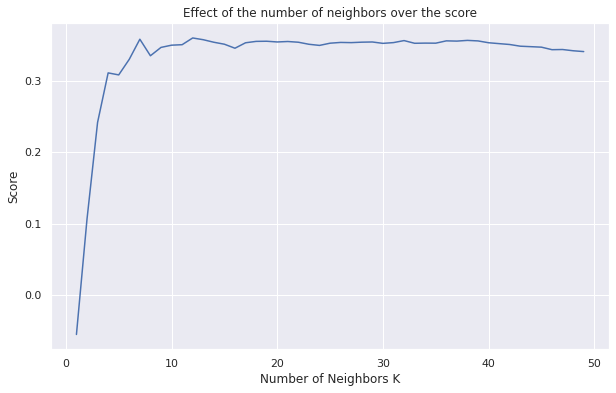

In [ ]:
score_list = []
n_neighbors = np.arange(1, 50, 1)
for num in n_neighbors:
  knn_regressor.set_params(n_neighbors = num)
  knn_regressor.fit(x_train, y_train)
  score_list.append(knn_regressor.score(x_val, y_val)) 

plt.figure(figsize = (10, 6))
plt.title("Effect of the number of neighbors over the score")
plt.xlabel("Number of Neighbors K")
plt.ylabel("Score")
plt.plot(n_neighbors, score_list)

In [ ]:
print("The max accuracy of the KnnRegrresor model: ", max(score_list))
print("K value to achieve this result: ", n_neighbors[score_list.index(max(score_list))])

The max accuracy of the KnnRegrresor model:  0.3605135027375713
K value to achieve this result:  12


In [ ]:
knn_regressor.set_params(n_neighbors = 12)
knn_regressor.fit(x_train, y_train)
knn_regressor.score(x_test, y_test)

0.367959737352623

In [ ]:
submission_pred_KNN= knn_regressor.predict(df_test)

In [ ]:
predictions = scaler.inverse_transform(submission_pred_KNN.reshape(-1,1))

In [ ]:
#np.info(predictions.flatten())  to get a 1- dimensional array for the submission

In [ ]:
df_submission = pd.DataFrame({'ID':ID_test,'total_cost':predictions.flatten()})

In [ ]:
df_submission.head()

,ID,total_cost
0,tour_1,2.027948e+07
1,tour_100,7.913888e+06
2,tour_1001,8.455107e+06
3,tour_1006,3.965973e+06
4,tour_1009,1.900355e+07


In [ ]:
df_submission.to_csv('final_33.csv',index=False)

### Ensemble (Stacking Regressor)
<div dir=rtl>


In [ ]:
# split to train, val and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3,random_state = 1)
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size = 0.5,random_state = 1)

NameError: ignored

In [ ]:
print(f'x_train: {x_train.shape}')
print(f'x_val: {x_val.shape}')
print(f'x_test: {x_test.shape}')
print(f'y_train: {y_train.shape}')
print(f'y_val: {y_val.shape}')
print(f'y_test: {y_test.shape}')

NameError: ignored

In [ ]:
estimators = [
    ('CatBoost', CatBoostRegressor(learning_rate=0.15, random_state=1)),
    ('LGBM', LGBMRegressor(learning_rate=0.03, random_state=1, objective='mae')),
    ('XGB', XGBRegressor(learning_rate=0.1, random_state=1, eval_metric='mae')),
    ('RFR', RandomForestRegressor(random_state=1, criterion='mae')),
    ('KNN', KNeighborsRegressor(n_neighbors=12, n_jobs=-1))    
]

In [ ]:
predictions = StackingRegressor(cv=3,n_jobs=1,estimators=estimators, final_estimator=CatBoostRegressor(random_state=1,loss_function=mean_absolute_error)).fit(x_train,y_train).predict(df_test)

NameError: ignored

In [ ]:
ensemble_predictions = scaler.inverse_transform(predictions.reshape(-1,1))

In [ ]:
#np.info(predictions.flatten())  to get a 1- dimensional array for the submission

In [ ]:
df_submission = pd.DataFrame({'ID':ID_test,'total_cost':ensemble_predictions.flatten()})

In [ ]:
df_submission.head()

,ID,total_cost
0,tour_1,1.823703e+07
1,tour_100,1.969369e+07
2,tour_1001,1.334412e+07
3,tour_1006,3.069731e+06
4,tour_1009,1.063801e+07


In [ ]:
df_submission.to_csv('final_35.csv',index=False)